In [1]:
import numpy as np # algebre lineaire
import pandas as pd # analyse des données
import seaborn as sns # visualiser les données
import matplotlib.pyplot as plt # visualiser les données

In [2]:
#data2016
#colonnes_utiles=['OSEBuildingID','BuildingType','PrimaryPropertyType','PropertyName','YearBuilt','ENERGYSTARScore','SiteEnergyUse(kBtu)','TotalGHGEmissions']
data2016= pd.read_csv('2016-building-energy-benchmarking.csv')
# imprimer toutes les colonnes
pd.set_option('display.max_columns', None)
data2016.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [3]:
# Dimension data2016
data2016.shape

(3376, 46)

In [4]:
# les variables data2016
data2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [5]:
data2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

In [6]:
data2016['PrimaryPropertyType'].value_counts()

Low-Rise Multifamily           987
Mid-Rise Multifamily           564
Small- and Mid-Sized Office    293
Other                          256
Warehouse                      187
Large Office                   173
K-12 School                    139
Mixed Use Property             133
High-Rise Multifamily          105
Retail Store                    91
Hotel                           77
Worship Facility                71
Distribution Center             53
Senior Care Community           45
Supermarket / Grocery Store     40
Medical Office                  39
Self-Storage Facility           28
University                      25
Residence Hall                  23
Refrigerated Warehouse          12
Restaurant                      12
Hospital                        10
Laboratory                      10
Office                           3
Name: PrimaryPropertyType, dtype: int64

In [7]:
#data2015
#colonnes_utiles=['OSEBuildingID','BuildingType','PrimaryPropertyType','PropertyName','YearBuilt','ENERGYSTARScore','SiteEnergyUse(kBtu)','GHGEmissions(MetricTonsCO2e)']
data2015= pd.read_csv('2015-building-energy-benchmarking.csv')
# imprimer toutes les colonnes
pd.set_option('display.max_columns', None)
data2015.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [8]:
# Dimension data2015
data2015.shape

(3340, 47)

In [9]:
# les variables data2015
data2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [10]:
data2015.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 47 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   OSEBuildingID                                                  3340 non-null   int64  
 1   DataYear                                                       3340 non-null   int64  
 2   BuildingType                                                   3340 non-null   object 
 3   PrimaryPropertyType                                            3340 non-null   object 
 4   PropertyName                                                   3340 non-null   object 
 5   TaxParcelIdentificationNumber                                  3338 non-null   object 
 6   Location                                                       3340 non-null   object 
 7   CouncilDistrictCode                                         

In [11]:
data2015['PrimaryPropertyType'].value_counts()

Low-Rise Multifamily           998
Mid-Rise Multifamily           539
Small- and Mid-Sized Office    297
Other                          258
Non-Refrigerated Warehouse     187
Large Office                   171
K-12 School                    136
Mixed Use Property             126
High-Rise Multifamily          103
Retail Store                   100
Hotel                           73
Worship Facility                72
Distribution Center\n           51
Medical Office                  43
Senior Care Community           43
Supermarket/Grocery Store       36
Self-Storage Facility\n         27
College/University              22
Residence Hall/Dormitory        15
Refrigerated Warehouse          13
Restaurant\n                    11
Hospital                        10
SPS-District K-12                4
Distribution Center              2
Restaurant                       1
Self-Storage Facility            1
Laboratory                       1
Name: PrimaryPropertyType, dtype: int64

In [12]:
## Identifier les colonnes communs entre les 2 bases de données.
col_commun=data2015.columns.intersection(data2016.columns)
col_commun

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'CouncilDistrictCode',
       'Neighborhood', 'YearBuilt', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFAParking', 'PropertyGFABuilding(s)',
       'ListOfAllPropertyUseTypes', 'LargestPropertyUseType',
       'LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'ThirdLargestPropertyUseType',
       'ThirdLargestPropertyUseTypeGFA', 'YearsENERGYSTARCertified',
       'ENERGYSTARScore', 'SiteEUI(kBtu/sf)', 'SiteEUIWN(kBtu/sf)',
       'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)', 'Electricity(kWh)',
       'Electricity(kBtu)', 'NaturalGas(therms)', 'NaturalGas(kBtu)',
       'DefaultData', 'ComplianceStatus', 'Outlier'],
      dtype='object')

In [13]:
# colonnes de data2016 et non de data2015(5) et (4) à correspondre leur nom au noms de data2015 
unique2016=data2016.columns.difference(col_commun)
unique2016

Index(['Address', 'City', 'Comments', 'GHGEmissionsIntensity', 'Latitude',
       'Longitude', 'State', 'TotalGHGEmissions', 'ZipCode'],
      dtype='object')

In [14]:
# colonnes  de data2015 et non de data2016(6)et (4) à correspondre leur nom au noms de data2016
unique2015=data2015.columns.difference(col_commun)
unique2015

Index(['2010 Census Tracts', 'City Council Districts', 'Comment',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'Location', 'OtherFuelUse(kBtu)', 'SPD Beats',
       'Seattle Police Department Micro Community Policing Plan Areas',
       'Zip Codes'],
      dtype='object')

In [15]:
df_unique2016=data2016[list(unique2016)]
df_unique2016.head()

,Address,City,Comments,GHGEmissionsIntensity,Latitude,Longitude,State,TotalGHGEmissions,ZipCode
0,405 Olive way,Seattle,NaN,2.83,47.61220,-122.33799,WA,249.98,98101.0
1,724 Pine street,Seattle,NaN,2.86,47.61317,-122.33393,WA,295.86,98101.0
2,1900 5th Avenue,Seattle,NaN,2.19,47.61393,-122.33810,WA,2089.28,98101.0
3,620 STEWART ST,Seattle,NaN,4.67,47.61412,-122.33664,WA,286.43,98101.0
4,401 LENORA ST,Seattle,NaN,2.88,47.61375,-122.34047,WA,505.01,98121.0


In [16]:
## supprimer des variables inutules pour l'analyse. 
data2016.drop(['Address','City','Comments','Latitude','Longitude','State'], axis=1, inplace=True)

In [17]:
df_unique2015=data2015[list(unique2015)]
df_unique2015.head()

,2010 Census Tracts,City Council Districts,Comment,GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),Location,OtherFuelUse(kBtu),SPD Beats,Seattle Police Department Micro Community Policing Plan Areas,Zip Codes
0,NaN,NaN,NaN,249.43,2.64,"{'latitude': '47.61219025', 'longitude': '-122...",0.0,31.0,14.0,18081
1,NaN,NaN,NaN,263.51,2.38,"{'latitude': '47.61310583', 'longitude': '-122...",0.0,31.0,14.0,18081
2,NaN,NaN,NaN,2061.48,1.92,"{'latitude': '47.61334897', 'longitude': '-122...",0.0,31.0,56.0,18081
3,NaN,NaN,NaN,1936.34,31.38,"{'latitude': '47.61421585', 'longitude': '-122...",0.0,31.0,56.0,18081
4,NaN,NaN,NaN,507.70,4.02,"{'latitude': '47.6137544', 'longitude': '-122....",0.0,31.0,56.0,19576


In [18]:
##supprimer les colonnes inutiles de la data2015
data2015.drop(['2010 Census Tracts',
               'City Council Districts',
               'Comment',
               'Location',
               'OtherFuelUse(kBtu)',
               'SPD Beats',
               'Seattle Police Department Micro Community Policing Plan Areas'], axis=1, inplace=True)

In [19]:
## Renommer les colonnes dans les 2 bases de données 2015 et 2016, de sorte qu'elles ont les memes noms. 

In [20]:
# avoir les memes noms et types  pour les variables des 2 data bases 'ZipeCode'
data2015.rename({'Zip Codes': 'ZipCode'}, axis=1, inplace= True)
data2015['ZipCode']=data2015['ZipCode'].astype('object')
data2016['ZipCode']=data2016['ZipCode'].astype('object')


In [21]:
#Faire en sorte que le nom de la colonne CHGEmissions soit le même dans les deux bases de données.
data2015.rename({'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions', 
                          'GHGEmissionsIntensity(kgCO2e/ft2)': 'GHGEmissionsIntensity'}, axis=1, inplace=True)

In [22]:
# Maintenant verifions si les types de données sont identiques dans les deux bases de données data2015 et data2016
data2015['NumberofBuildings'].astype(float)
data2016['NumberofFloors'].astype(float)
data2016['DefaultData'].astype(object)

0       False
1       False
2       False
3       False
4       False
        ...  
3371     True
3372    False
3373    False
3374    False
3375    False
Name: DefaultData, Length: 3376, dtype: object

In [23]:
cols2015_new= set(data2015.columns)
cols2016_new= set(data2016.columns)
cols_commun= cols2016_new.intersection(cols2015_new)
cols_commun

{'BuildingType',
 'ComplianceStatus',
 'CouncilDistrictCode',
 'DataYear',
 'DefaultData',
 'ENERGYSTARScore',
 'Electricity(kBtu)',
 'Electricity(kWh)',
 'GHGEmissionsIntensity',
 'LargestPropertyUseType',
 'LargestPropertyUseTypeGFA',
 'ListOfAllPropertyUseTypes',
 'NaturalGas(kBtu)',
 'NaturalGas(therms)',
 'Neighborhood',
 'NumberofBuildings',
 'NumberofFloors',
 'OSEBuildingID',
 'Outlier',
 'PrimaryPropertyType',
 'PropertyGFABuilding(s)',
 'PropertyGFAParking',
 'PropertyGFATotal',
 'PropertyName',
 'SecondLargestPropertyUseType',
 'SecondLargestPropertyUseTypeGFA',
 'SiteEUI(kBtu/sf)',
 'SiteEUIWN(kBtu/sf)',
 'SiteEnergyUse(kBtu)',
 'SiteEnergyUseWN(kBtu)',
 'SourceEUI(kBtu/sf)',
 'SourceEUIWN(kBtu/sf)',
 'SteamUse(kBtu)',
 'TaxParcelIdentificationNumber',
 'ThirdLargestPropertyUseType',
 'ThirdLargestPropertyUseTypeGFA',
 'TotalGHGEmissions',
 'YearBuilt',
 'YearsENERGYSTARCertified',
 'ZipCode'}

In [24]:
unique2015_new= cols2015_new.difference(cols_commun)
unique2015_new

set()

In [25]:
unique2016_new= cols2016_new.difference(cols_commun)
unique2016_new

set()

In [26]:
# concatener data2015 et data2016 en une seule base de données data
data=pd.concat([data2015, data2016], ignore_index=True)
data.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,Outlier,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,249.43,2.64,No,Compliant,NaN,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,263.51,2.38,No,Compliant,NaN,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,2061.48,1.92,Yes,Compliant,NaN,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,1936.34,31.38,No,Compliant,High Outlier,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,507.70,4.02,No,Compliant,NaN,19576


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6716 entries, 0 to 6715
Data columns (total 40 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    6716 non-null   int64  
 1   DataYear                         6716 non-null   int64  
 2   BuildingType                     6716 non-null   object 
 3   PrimaryPropertyType              6716 non-null   object 
 4   PropertyName                     6716 non-null   object 
 5   TaxParcelIdentificationNumber    6714 non-null   object 
 6   CouncilDistrictCode              6716 non-null   int64  
 7   Neighborhood                     6716 non-null   object 
 8   YearBuilt                        6716 non-null   int64  
 9   NumberofBuildings                6708 non-null   float64
 10  NumberofFloors                   6708 non-null   float64
 11  PropertyGFATotal                 6716 non-null   int64  
 12  PropertyGFAParking  

In [28]:
data.shape

(6716, 40)

In [29]:
#pourcentage des valeurs manquantes dans data
(data.isnull().sum()/data.shape[0]).sort_values(ascending=True)

OSEBuildingID                      0.000000
DataYear                           0.000000
BuildingType                       0.000000
PrimaryPropertyType                0.000000
PropertyName                       0.000000
CouncilDistrictCode                0.000000
Neighborhood                       0.000000
YearBuilt                          0.000000
ComplianceStatus                   0.000000
PropertyGFATotal                   0.000000
PropertyGFAParking                 0.000000
PropertyGFABuilding(s)             0.000000
DefaultData                        0.000149
TaxParcelIdentificationNumber      0.000298
NumberofBuildings                  0.001191
NumberofFloors                     0.001191
SiteEnergyUse(kBtu)                0.002233
SiteEnergyUseWN(kBtu)              0.002382
SiteEUIWN(kBtu/sf)                 0.002382
ZipCode                            0.002382
SiteEUI(kBtu/sf)                   0.002531
SteamUse(kBtu)                     0.002829
SourceEUI(kBtu/sf)              

In [30]:
#supprimer'Outlier'98% NaN et 'YearsENERGYSTARCertified'97%NaN
data.drop(['YearsENERGYSTARCertified','Outlier'], axis=1, inplace=True)

In [31]:
data.shape

(6716, 38)

## il est précisié dans le projet que seuls les bâtiments non destinés à l'habitation seront étudiés. Nous allons donc supprimer toutes les lignes correspondant à des bâtiments destinés à l' habitation en nous basant sur la variable BuildingType

In [32]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Multifamily LR (1-4)', 'Campus',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

In [33]:
data.drop(data.loc[data['BuildingType'].str.contains("Multifamily")].index, inplace=True)

In [34]:
data['BuildingType'].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [35]:
data.shape

(3318, 38)

In [36]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,ZipCode
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,249.43,2.64,No,Compliant,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,263.51,2.38,No,Compliant,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,7,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,2061.48,1.92,Yes,Compliant,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,1.0,460.400000,462.500000,636.300000,643.200000,2.822932e+07,2.836344e+07,23458518.0,8.115210e+05,2.769023e+06,20019.000000,2.001894e+06,1936.34,31.38,No,Compliant,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,7,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,67.0,120.100000,122.100000,228.800000,227.100000,1.482910e+07,1.507824e+07,0.0,1.777841e+06,6.066245e+06,87631.000000,8.763105e+06,507.70,4.02,No,Compliant,19576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70,True,Error - Correct Default Data,NaN
6712,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01,False,Compliant,NaN
6713,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99,False,Compliant,NaN
6714,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,1,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0,NaN,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.0,1.022480e+05,3.488702e+05,3706.010

## Traitement des Doublons

In [37]:
data.OSEBuildingID.duplicated().sum()

1620

In [38]:
data.loc[data.OSEBuildingID.duplicated(), :]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,ZipCode
3340,1,2016,NonResidential,Hotel,Mayflower park hotel,0659000030,7,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3946027.0,12764.529300,1276453.0,249.98,2.83,False,Compliant,98101
3341,2,2016,NonResidential,Hotel,Paramount Hotel,0659000220,7,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3242851.0,51450.816410,5145082.0,295.86,2.86,False,Compliant,98101
3342,3,2016,NonResidential,Hotel,5673-The Westin Seattle,0659000475,7,DOWNTOWN,1969,1.0,41.0,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,49526664.0,14938.000000,1493800.0,2089.28,2.19,False,Compliant,98101
3343,5,2016,NonResidential,Hotel,HOTEL MAX,0659000640,7,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2768924.0,18112.130860,1811213.0,286.43,4.67,False,Compliant,98101
3344,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),0659000970,7,DOWNTOWN,1980,1.0,18.0,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5368607.0,88039.984380,8803998.0,505.01,2.88,False,Compliant,98121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6613,49966,2016,NonResidential,Other,Smilow Rainier Vista Boys & Girls Club,6056110050,2,SOUTHEAST,2009,1.0,0.0,40265,0,40265,Pre-school/Daycare,Pre-school/Daycare,40265.0,NaN,NaN,NaN,NaN,NaN,53.599998,56.200001,127.500000,130.199997,2.159170e+06,2.261076e+06,0.00,4.020232e+05,1371703.0,7874.669922,787467.0,51.39,1.28,False,Compliant,98108
6621,49985,2016,NonResidential,Large Office,Amazon Phase VI,1983200075,7,LAKE UNION,2014,1.0,6.0,427181,0,427181,"Office, Parking",Office,427181.0,Parking,169195.0,NaN,NaN,99.0,38.299999,39.400002,109.800003,111.900001,1.637104e+07,1.681085e+07,0.00,4.165604e+06,14213039.0,21579.984380,2157998.0,213.70,0.50,False,Compliant,98109
6630,49998,2016,NonResidential,Self-Storage Facility,West Coast Self-Storage of Columbia City,3357400211,2,SOUTHEAST,2014,1.0,4.0,101580,14004,87576,Self-Storage Facility,Self-Storage Facility,87576.0,NaN,NaN,NaN,NaN,NaN,10.700000,10.700000,32.000000,32.000000,9.408447e+05,9.408447e+05,0.00,2.544436e+05,868162.0,726.830139,72683.0,9.91,0.10,False,Compliant,98144
6634,50002,2016,NonResidential,Other,Audi Seattle UVA Bldg,6746701515,4,NORTHEAST,2014,1.0,3.0,33648,0,33648,"Automobile Dealership, Parking",Parking,83600.0,Automobile Dealership,39000.0,NaN,NaN,NaN,35.900002,35.900002,112.699997,112.699997,1.399582e+06,1.399582e+06,0.00,4.101939e+05,1399582.0,0.000000,0.0,9.76,0.29,False,Compliant,98105


In [39]:
columns_to_mean = ['NumberofBuildings', 
                'NumberofFloors', 
                'PropertyGFATotal',
                'PropertyGFAParking', 
                'PropertyGFABuilding(s)',
                'LargestPropertyUseTypeGFA', 
                'SecondLargestPropertyUseTypeGFA',
                'ThirdLargestPropertyUseTypeGFA',
                'ENERGYSTARScore', 
                'SiteEUI(kBtu/sf)',
                'SiteEUIWN(kBtu/sf)', 
                'SourceEUI(kBtu/sf)', 
                'SourceEUIWN(kBtu/sf)',
                'SiteEnergyUse(kBtu)', 
                'SiteEnergyUseWN(kBtu)', 
                'SteamUse(kBtu)',
                'Electricity(kWh)', 
                'Electricity(kBtu)', 
                'NaturalGas(therms)',
                'NaturalGas(kBtu)', 
                'TotalGHGEmissions', 
                'GHGEmissionsIntensity']

In [40]:
data_OSEBuildingID = data[['OSEBuildingID'] + columns_to_mean].groupby('OSEBuildingID')
data_OSEBuildingID.head()

,OSEBuildingID,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,1,1.0,12.0,88434,0,88434,88434.0,NaN,NaN,65.0,78.900000,80.300000,173.500000,175.100000,6.981428e+06,7.097539e+06,2023032.0,1.080307e+06,3.686160e+06,12724.000000,1.272388e+06,249.43,2.64
1,2,1.0,11.0,103566,15064,88502,83880.0,15064.0,4622.0,51.0,94.400000,99.000000,191.300000,195.200000,8.354235e+06,8.765788e+06,0.0,1.144563e+06,3.905411e+06,44490.000000,4.448985e+06,263.51,2.38
2,3,1.0,41.0,961990,0,961990,757243.0,100000.0,0.0,18.0,96.600000,99.700000,242.700000,246.500000,7.313066e+07,7.550627e+07,19660404.0,1.458393e+07,4.976244e+07,37099.000000,3.709900e+06,2061.48,1.92
3,5,1.0,10.0,61320,0,61320,61320.0,NaN,NaN,1.0,460.400000,462.500000,636.300000,643.200000,2.822932e+07,2.836344e+07,23458518.0,8.115210e+05,2.769023e+06,20019.000000,2.001894e+06,1936.34,31.38
4,8,1.0,18.0,119890,12460,107430,123445.0,68009.0,0.0,67.0,120.100000,122.100000,228.800000,227.100000,1.482910e+07,1.507824e+07,0.0,1.777841e+06,6.066245e+06,87631.000000,8.763105e+06,507.70,4.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50222,1.0,1.0,12294,0,12294,12294.0,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70
6712,50223,1.0,1.0,16000,0,16000,16000.0,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01
6713,50224,1.0,1.0,13157,0,13157,7583.0,5574.0,0.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99
6714,50225,1.0,1.0,14101,0,14101,6601.0,6501.0,484.0,NaN,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.0,1.022480e+05,3.488702e+05,3706.010010,3.706010e+05,22.11,1.57


In [41]:
data_OSEBuilding_means = data_OSEBuildingID.mean()
data_OSEBuilding_means.head()

,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,
1,1.0,12.0,88434.0,0.0,88434.0,88434.0,NaN,NaN,62.5,80.299998,82.300002,178.000000,182.050000,7103895.25,7277224.50,2.013457e+06,1.118411e+06,3816093.5,12744.264650,1274420.5,249.705,2.735
2,1.0,11.0,103566.0,15064.0,88502.0,83880.0,15064.0,4622.0,56.0,94.600002,98.450001,183.700003,187.299997,8371084.00,8715133.50,0.000000e+00,1.047494e+06,3574131.0,47970.408205,4797033.5,279.685,2.620
3,1.0,41.0,959050.0,98359.0,860691.0,756868.0,100000.0,0.0,30.5,96.300000,98.699998,242.299997,245.300003,72858840.00,74721692.00,2.061348e+07,1.454968e+07,49644549.5,26018.500000,2601850.0,2075.380,2.055
5,1.0,10.0,61320.0,0.0,61320.0,61320.0,NaN,NaN,28.5,285.600002,287.900002,426.249998,433.600000,17511952.00,17655122.25,1.283648e+07,8.115232e+05,2768973.5,19065.565430,1906553.5,1111.385,18.025
8,1.0,18.0,147735.0,37230.0,110505.0,123445.0,68009.0,0.0,71.0,117.450002,120.399998,220.099997,221.350003,14500852.50,14867373.00,0.000000e+00,1.675645e+06,5717426.0,87835.492190,8783551.5,506.355,3.450


In [42]:
#on supprime les doublons des batiments
data_duplicate = data.drop_duplicates(subset=['OSEBuildingID'], keep='last')
data_duplicate.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,DefaultData,ComplianceStatus,ZipCode
204,325,2015,NonResidential,Retail Store,WESTLAKE MALL RETAIL PORTION,659000005,7,DOWNTOWN,1989,1.0,4.0,111077,0,111077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.0,60.6,62.1,190.2,195.1,9898724.0,10155788.0,0.0,2901150.0,9899135.0,0.0,0.0,69.01,0.24,No,Compliant,18081
272,400,2015,NonResidential,Small- and Mid-Sized Office,GALLAND & SENECA BUILDINGS,1974700175,7,DOWNTOWN,1906,1.0,6.0,98370,25920,72450,Office,Office,98370.0,NaN,NaN,NaN,NaN,45.0,66.3,66.5,207.5,207.7,6525887.0,6541579.0,0.0,1901522.0,6488262.0,379.0,37893.0,47.24,0.20,No,Compliant,18081
312,442,2015,NonResidential,Large Office,KING BROADCASTING,1991200870,7,LAKE UNION,1947,1.0,4.0,193788,37854,155934,"Data Center, Office, Other, Parking, Restaurant",Office,138672.0,Parking,47539.0,Other,11166.0,59.0,105.8,104.0,332.3,326.4,16760217.0,16463978.0,0.0,4912139.0,16760914.0,0.0,0.0,116.84,0.23,No,Compliant,18390
358,499,2015,NonResidential,Small- and Mid-Sized Office,ASIAN COUNSELING and REFERRAL SERVICE BUILDING,1426300170,2,GREATER DUWAMISH,2008,1.0,3.0,76598,21410,55188,"Office, Parking",Office,55188.0,Parking,21410.0,NaN,NaN,76.0,81.1,83.7,169.8,166.9,4476997.0,4617864.0,0.0,654779.0,2234200.0,22429.0,2242889.0,134.69,1.63,Yes,Compliant,18388
405,559,2015,NonResidential,Large Office,YALE & THOMAS,6847700105,7,LAKE UNION,1981,1.0,4.0,186971,0,186971,"Office, Parking",Office,186977.0,Parking,115477.0,NaN,NaN,86.0,67.7,72.6,179.1,184.2,12662456.0,13575377.0,0.0,2830466.0,9657951.0,30049.0,3004906.0,226.92,0.99,No,Compliant,18390


In [43]:
#on remplace les valeurs initiales de nos variables par les valeurs moyennées sur les deux ans
data_duplicate.drop(columns_to_mean, axis=1, inplace=True)
data = pd.merge(data_duplicate, data_OSEBuilding_means, how='left', on='OSEBuildingID')

C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [44]:
data

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,YearBuilt,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,DefaultData,ComplianceStatus,ZipCode,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,325,2015,NonResidential,Retail Store,WESTLAKE MALL RETAIL PORTION,659000005,7,DOWNTOWN,1989,NaN,NaN,NaN,NaN,No,Compliant,18081,1.0,4.0,111077.0,0.0,111077.0,NaN,NaN,NaN,91.0,60.600000,62.100000,190.200000,195.100000,9.898724e+06,1.015579e+07,0.0,2.901150e+06,9.899135e+06,0.000000,0.000000e+00,69.01,0.24
1,400,2015,NonResidential,Small- and Mid-Sized Office,GALLAND & SENECA BUILDINGS,1974700175,7,DOWNTOWN,1906,Office,Office,NaN,NaN,No,Compliant,18081,1.0,6.0,98370.0,25920.0,72450.0,98370.0,NaN,NaN,45.0,66.300000,66.500000,207.500000,207.700000,6.525887e+06,6.541579e+06,0.0,1.901522e+06,6.488262e+06,379.000000,3.789300e+04,47.24,0.20
2,442,2015,NonResidential,Large Office,KING BROADCASTING,1991200870,7,LAKE UNION,1947,"Data Center, Office, Other, Parking, Restaurant",Office,Parking,Other,No,Compliant,18390,1.0,4.0,193788.0,37854.0,155934.0,138672.0,47539.0,11166.0,59.0,105.800000,104.000000,332.300000,326.400000,1.676022e+07,1.646398e+07,0.0,4.912139e+06,1.676091e+07,0.000000,0.000000e+00,116.84,0.23
3,499,2015,NonResidential,Small- and Mid-Sized Office,ASIAN COUNSELING and REFERRAL SERVICE BUILDING,1426300170,2,GREATER DUWAMISH,2008,"Office, Parking",Office,Parking,NaN,Yes,Compliant,18388,1.0,3.0,76598.0,21410.0,55188.0,55188.0,21410.0,NaN,76.0,81.100000,83.700000,169.800000,166.900000,4.476997e+06,4.617864e+06,0.0,6.547790e+05,2.234200e+06,22429.000000,2.242889e+06,134.69,1.63
4,559,2015,NonResidential,Large Office,YALE & THOMAS,6847700105,7,LAKE UNION,1981,"Office, Parking",Office,Parking,NaN,No,Compliant,18390,1.0,4.0,186971.0,0.0,186971.0,186977.0,115477.0,NaN,86.0,67.700000,72.600000,179.100000,184.200000,1.266246e+07,1.357538e+07,0.0,2.830466e+06,9.657951e+06,30049.000000,3.004906e+06,226.92,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,50222,2016,Nonresidential COS,Office,Horticulture building,1624049080,2,GREATER DUWAMISH,1990,Office,Office,NaN,NaN,True,Error - Correct Default Data,NaN,1.0,1.0,12294.0,0.0,12294.0,12294.0,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,20.94,1.70
1694,50223,2016,Nonresidential COS,Other,International district/Chinatown CC,3558300000,2,DOWNTOWN,2004,Other - Recreation,Other - Recreation,NaN,NaN,False,Compliant,NaN,1.0,1.0,16000.0,0.0,16000.0,16000.0,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.0,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,32.17,2.01
1695,50224,2016,Nonresidential COS,Other,Queen Anne Pool,1794501150,7,MAGNOLIA / QUEEN ANNE,1974,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,False,Compliant,NaN,1.0,1.0,13157.0,0.0,13157.0,7583.0,5574.0,0.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,5.252517e+05,1.792159e+06,39737.390630,3.973739e+06,223.54,16.99
1696,50225,2016,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,1,GREATER DUWAMISH,1989,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,False,Compliant,NaN,1.0,1.0,14

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1698 entries, 0 to 1697
Data columns (total 38 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1698 non-null   int64  
 1   DataYear                         1698 non-null   int64  
 2   BuildingType                     1698 non-null   object 
 3   PrimaryPropertyType              1698 non-null   object 
 4   PropertyName                     1698 non-null   object 
 5   TaxParcelIdentificationNumber    1698 non-null   object 
 6   CouncilDistrictCode              1698 non-null   int64  
 7   Neighborhood                     1698 non-null   object 
 8   YearBuilt                        1698 non-null   int64  
 9   ListOfAllPropertyUseTypes        1690 non-null   object 
 10  LargestPropertyUseType           1686 non-null   object 
 11  SecondLargestPropertyUseType     866 non-null    object 
 12  ThirdLargestProperty

In [46]:
#certaines variables apparaissent déjà comme redondantes :

In [47]:
#Electricity(kWh) et Electricity(kBtu), # 1 kWh x 3.142 = 3.142 kBtu
data.drop('Electricity(kWh)', axis=1, inplace=True)

In [48]:
##NaturalGas(therms) et NaturalGas(kBtu)
data.drop('NaturalGas(therms)', axis=1, inplace=True)

In [49]:
data.shape

(1698, 36)

In [50]:
data.describe()

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
count,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1698.000000,1.698000e+03,1698.000000,1.698000e+03,1.686000e+03,868.000000,361.000000,1154.000000,1697.000000,1697.000000,1697.000000,1697.000000,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03,1.697000e+03,1697.000000,1697.000000
mean,16339.776207,2015.982332,4.369258,1961.704947,1.148704,4.101885,1.183777e+05,13421.728504,1.049560e+05,9.887040e+04,37052.186807,14719.000829,64.951906,72.104331,75.219210,176.282793,179.240719,8.457072e+06,8.121502e+06,5.133132e+05,5.865634e+06,1.971806e+06,185.235053,1.501859
std,13811.042261,0.131780,2.191411,32.850343,2.810159,6.516620,2.951875e+05,42938.707728,2.806832e+05,2.757407e+05,69558.513905,36335.391749,28.041709,73.490710,74.930650,183.783580,183.519181,3.010387e+07,2.204160e+07,5.351773e+06,2.069226e+07,9.400898e+06,745.538021,2.266608
min,1.000000,2015.000000,1.000000,1900.000000,0.500000,0.000000,1.128500e+04,-1.000000,-8.451000e+03,6.455000e+03,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-2.050000,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,0.000000e+00,0.120000,0.000000
25%,584.250000,2016.000000,2.000000,1930.000000,1.000000,1.000000,2.939250e+04,0.000000,2.833200e+04,2.548025e+04,5683.500000,2592.000000,46.500000,32.900000,35.600000,77.250002,80.699999,1.215360e+06,1.334535e+06,0.000000e+00,7.328030e+05,0.000000e+00,20.150000,0.275000
50%,21161.000000,2016.000000,4.000000,1965.000000,1.000000,2.000000,4.926600e+04,0.000000,4.739150e+04,4.348400e+04,12447.500000,5931.000000,72.500000,51.700001,54.700001,131.750000,135.100003,2.555917e+06,2.715609e+06,0.000000e+00,1.649172e+06,4.974050e+05,50.215000,0.785000
75%,24601.750000,2016.000000,7.000000,1989.000000,1.000000,4.000000,1.068380e+05,0.000000,9.524950e+04,9.198825e+04,32066.000000,12400.000000,88.000000,82.450000,86.400002,206.549997,208.650002,6.960904e+06,7.302520e+06,0.000000e+00,4.871044e+06,1.507822e+06,139.630000,1.765000
max,50226.000000,2016.000000,7.000000,2015.000000,111.000000,99.000000,9.320156e+06,512608.000000,9.320156e+06,9.320156e+06,686750.000000,459748.000000,100.000000,834.400024,834.400024,2620.000000,2620.000000,8.739237e+08,4.716139e+08,1.314066e+08,6.570744e+08,2.979090e+08,16870.980000,34.090000


In [51]:
data.describe(include='O')

,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,DefaultData,ComplianceStatus,ZipCode
count,1698,1698,1698,1698,1698,1690,1686,866,356,1698,1698,1682.0
unique,5,24,1694,1616,19,378,57,47,39,4,4,62.0
top,NonResidential,Small- and Mid-Sized Office,Bayview Building,1625049001,DOWNTOWN,Office,Office,Parking,Office,False,Compliant,98134.0
freq,1488,299,2,8,370,144,507,343,49,1580,1578,182.0


In [52]:
# renseigner les valeurs numériques et celles catégoriques
cat_data=[]
num_data=[]
for i,c in enumerate(data.dtypes):
    if c==object:
        cat_data.append(data.iloc[:,i])
    else:
        num_data.append(data.iloc[:,i])
        
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()

In [53]:
num_data

,OSEBuildingID,DataYear,CouncilDistrictCode,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,325.0,2015.0,7.0,1989.0,1.0,4.0,111077.0,0.0,111077.0,NaN,NaN,NaN,91.0,60.600000,62.100000,190.200000,195.100000,9.898724e+06,1.015579e+07,0.0,9.899135e+06,0.000000e+00,69.01,0.24
1,400.0,2015.0,7.0,1906.0,1.0,6.0,98370.0,25920.0,72450.0,98370.0,NaN,NaN,45.0,66.300000,66.500000,207.500000,207.700000,6.525887e+06,6.541579e+06,0.0,6.488262e+06,3.789300e+04,47.24,0.20
2,442.0,2015.0,7.0,1947.0,1.0,4.0,193788.0,37854.0,155934.0,138672.0,47539.0,11166.0,59.0,105.800000,104.000000,332.300000,326.400000,1.676022e+07,1.646398e+07,0.0,1.676091e+07,0.000000e+00,116.84,0.23
3,499.0,2015.0,2.0,2008.0,1.0,3.0,76598.0,21410.0,55188.0,55188.0,21410.0,NaN,76.0,81.100000,83.700000,169.800000,166.900000,4.476997e+06,4.617864e+06,0.0,2.234200e+06,2.242889e+06,134.69,1.63
4,559.0,2015.0,7.0,1981.0,1.0,4.0,186971.0,0.0,186971.0,186977.0,115477.0,NaN,86.0,67.700000,72.600000,179.100000,184.200000,1.266246e+07,1.357538e+07,0.0,9.657951e+06,3.004906e+06,226.92,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,50222.0,2016.0,2.0,1990.0,1.0,1.0,12294.0,0.0,12294.0,12294.0,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.0,5.242709e+05,3.254750e+05,20.94,1.70
1694,50223.0,2016.0,2.0,2004.0,1.0,1.0,16000.0,0.0,16000.0,16000.0,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900001,9.502762e+05,1.053706e+06,0.0,3.965461e+05,5.537300e+05,32.17,2.01
1695,50224.0,2016.0,7.0,1974.0,1.0,1.0,13157.0,0.0,13157.0,7583.0,5574.0,0.0,NaN,438.200012,460.100006,744.799988,767.799988,5.765898e+06,6.053764e+06,0.0,1.792159e+06,3.973739e+06,223.54,16.99
1696,50225.0,2016.0,1.0,1989.0,1.0,1.0,14101.0,0.0,14101.0,6601.0,6501.0,484.0,NaN,51.000000,55.500000,105.300003,110.800003,7.194712e+05,7.828413e+05,0.0,3.488702e+05,3.706010e+05,22.11,1.57


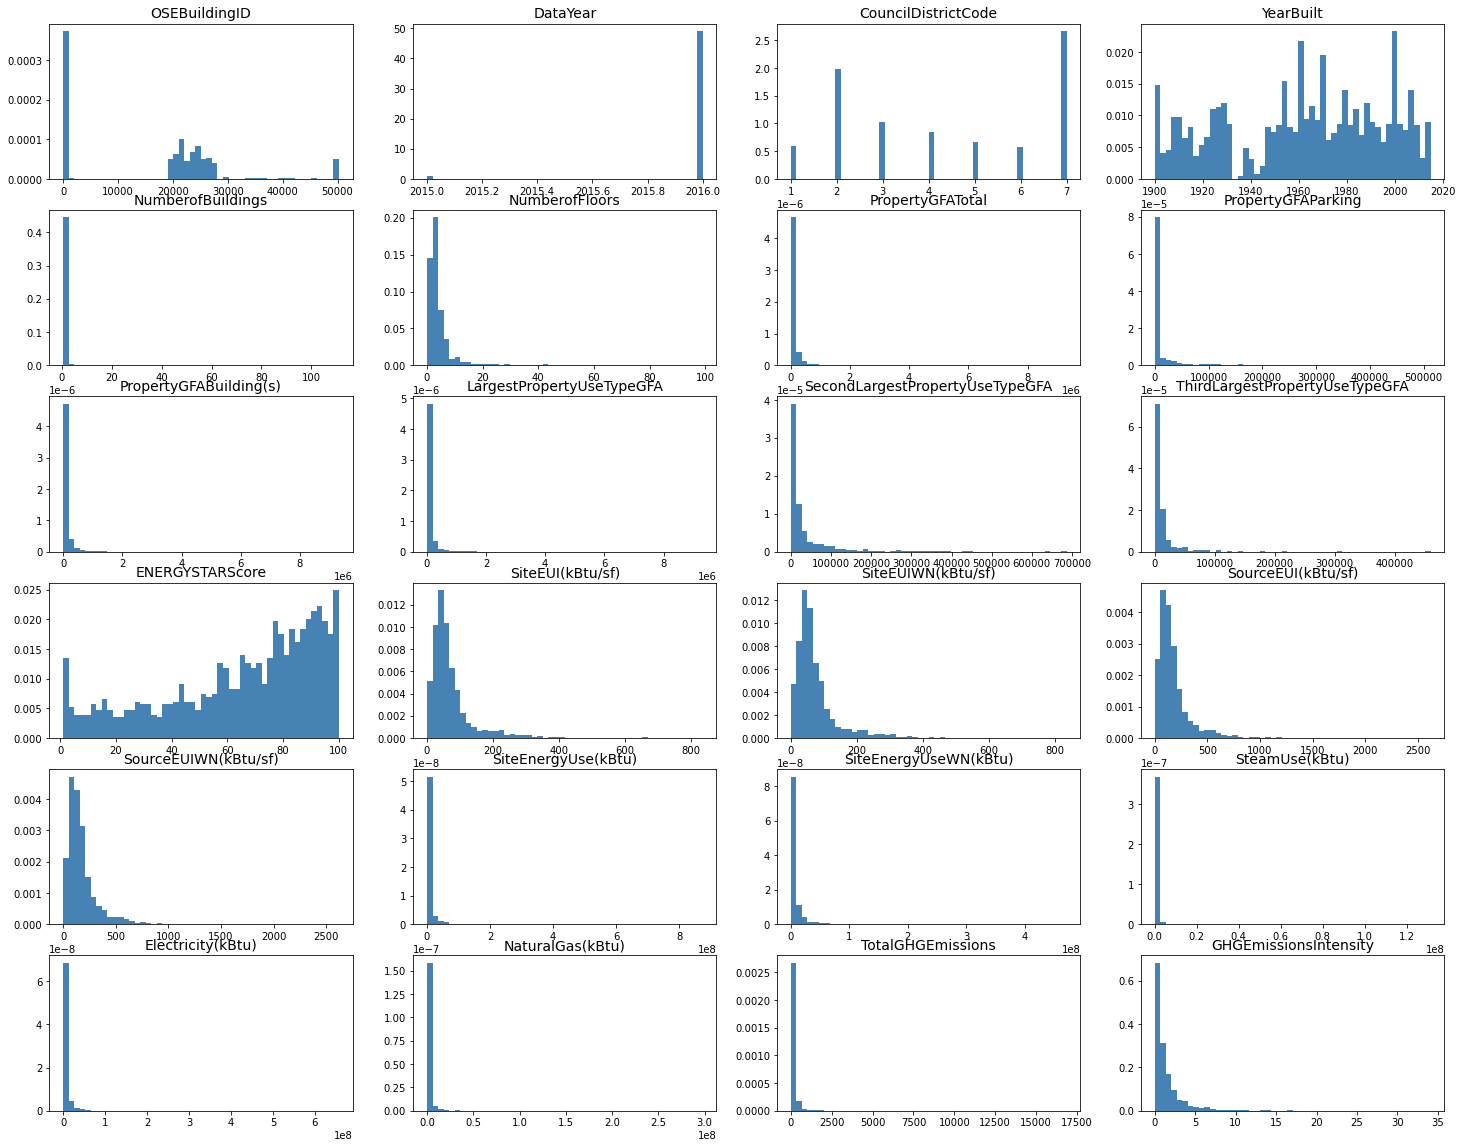

In [54]:
fig = plt.figure(figsize=(25, 20))
for feat_idx in range(num_data.shape[1]):
    ax = fig.add_subplot(6,4, (feat_idx+1))
    h = ax.hist(num_data.iloc[:, feat_idx], bins=50, color='steelblue', density=True, edgecolor='none')
    ax.set_title(num_data.columns[feat_idx], fontsize=14)


## definitions des variables numeriques

In [55]:
#supprimer les variables inutiles
num_data.drop(['OSEBuildingID','CouncilDistrictCode', ], axis=1, inplace=True)

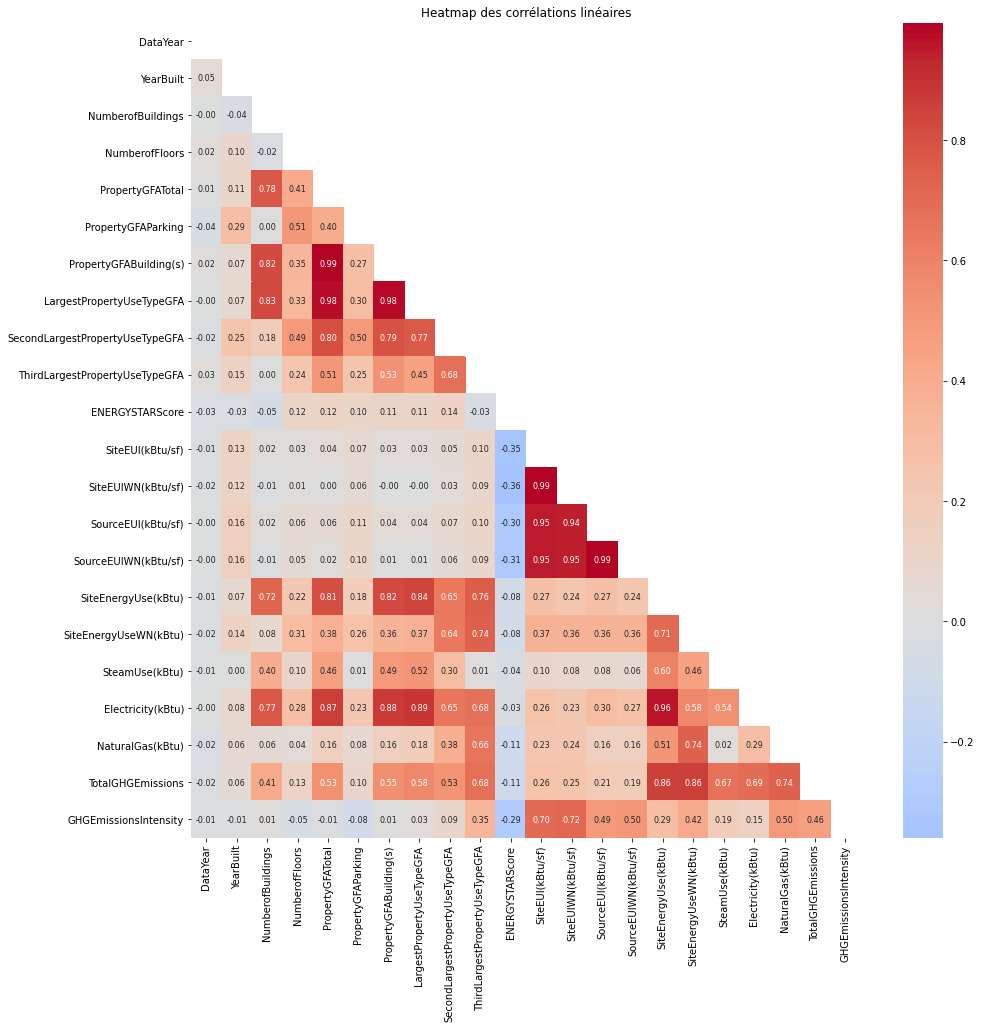

In [56]:
#correlations linéaire entre les variables numériques
corr = num_data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(15,15))
ax = sns.heatmap(corr, annot=True, fmt=".2f", annot_kws={'size':8}, 
                 mask=mask, center=0, cmap="coolwarm")
plt.title("Heatmap des corrélations linéaires")
plt.show()

In [57]:
#je definis une fonction qui cherche la variable contenant un suffix
def search_variable(df, suffix=None):
    variable = []
    for col in df.columns:
        if suffix in col: 
            variable.append(col)
    return variable

In [58]:
WN_columns=search_variable(num_data, suffix='WN')
WN_columns

['SiteEUIWN(kBtu/sf)', 'SourceEUIWN(kBtu/sf)', 'SiteEnergyUseWN(kBtu)']

In [59]:
num_data.drop(['SiteEUI(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)'], axis=1, inplace=True)

In [60]:
GFA_columns= search_variable(num_data,suffix='GFA')
GFA_columns

['PropertyGFATotal',
 'PropertyGFAParking',
 'PropertyGFABuilding(s)',
 'LargestPropertyUseTypeGFA',
 'SecondLargestPropertyUseTypeGFA',
 'ThirdLargestPropertyUseTypeGFA']

In [61]:
num_data[GFA_columns]

,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseTypeGFA
0,111077.0,0.0,111077.0,NaN,NaN,NaN
1,98370.0,25920.0,72450.0,98370.0,NaN,NaN
2,193788.0,37854.0,155934.0,138672.0,47539.0,11166.0
3,76598.0,21410.0,55188.0,55188.0,21410.0,NaN
4,186971.0,0.0,186971.0,186977.0,115477.0,NaN
...,...,...,...,...,...,...
1693,12294.0,0.0,12294.0,12294.0,NaN,NaN
1694,16000.0,0.0,16000.0,16000.0,NaN,NaN
1695,13157.0,0.0,13157.0,7583.0,5574.0,0.0
1696,14101.0,0.0,14101.0,6601.0,6501.0,484.0


In [62]:
# on supprime:
num_data.drop(['SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA'], axis=1, inplace=True)

In [63]:
num_data

,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity
0,2015.0,1989.0,1.0,4.0,111077.0,0.0,111077.0,NaN,91.0,62.100000,195.100000,1.015579e+07,0.0,9.899135e+06,0.000000e+00,69.01,0.24
1,2015.0,1906.0,1.0,6.0,98370.0,25920.0,72450.0,98370.0,45.0,66.500000,207.700000,6.541579e+06,0.0,6.488262e+06,3.789300e+04,47.24,0.20
2,2015.0,1947.0,1.0,4.0,193788.0,37854.0,155934.0,138672.0,59.0,104.000000,326.400000,1.646398e+07,0.0,1.676091e+07,0.000000e+00,116.84,0.23
3,2015.0,2008.0,1.0,3.0,76598.0,21410.0,55188.0,55188.0,76.0,83.700000,166.900000,4.617864e+06,0.0,2.234200e+06,2.242889e+06,134.69,1.63
4,2015.0,1981.0,1.0,4.0,186971.0,0.0,186971.0,186977.0,86.0,72.600000,184.200000,1.357538e+07,0.0,9.657951e+06,3.004906e+06,226.92,0.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,2016.0,1990.0,1.0,1.0,12294.0,0.0,12294.0,12294.0,46.0,76.699997,176.100006,9.430032e+05,0.0,5.242709e+05,3.254750e+05,20.94,1.70
1694,2016.0,2004.0,1.0,1.0,16000.0,0.0,16000.0,16000.0,NaN,65.900002,118.900001,1.053706e+06,0.0,3.965461e+05,5.537300e+05,32.17,2.01
1695,2016.0,1974.0,1.0,1.0,13157.0,0.0,13157.0,7583.0,NaN,460.100006,767.799988,6.053764e+06,0.0,1.792159e+06,3.973739e+06,223.54,16.99
1696,2016.0,1989.0,1.0,1.0,14101.0,0.0,14101.0,6601.0,NaN,55.500000,110.800003,7.828413e+05,0.0,3.488702e+05,3.706010e+05,22.11,1.57


<AxesSubplot:>

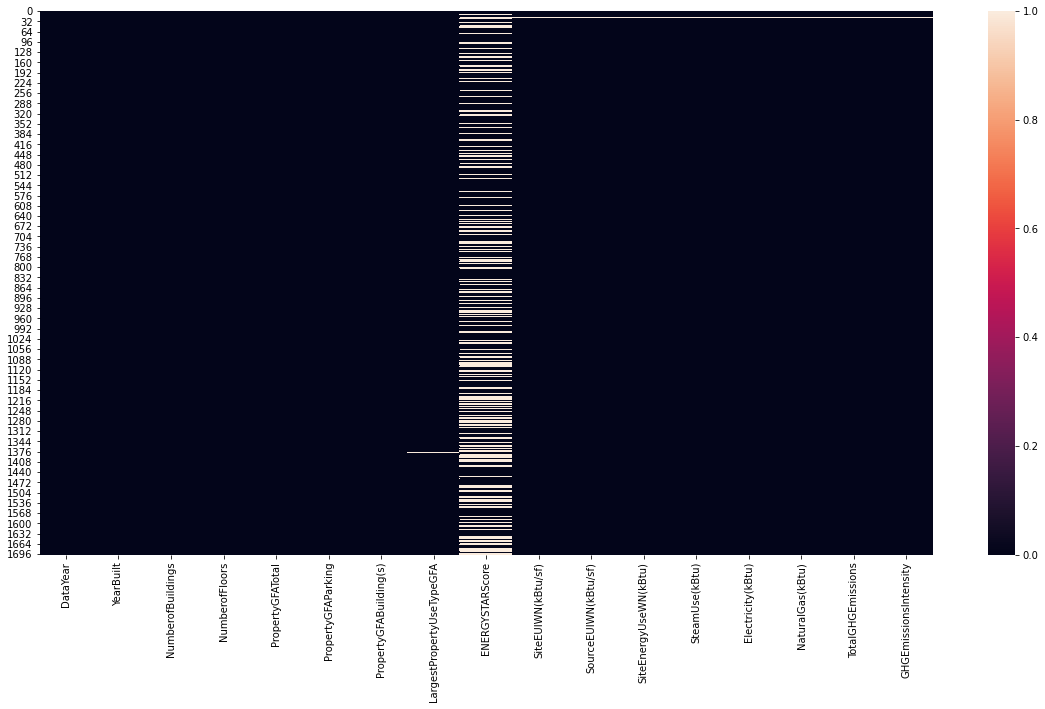

In [64]:
#affichage des valeurs manquantes(num_data)
plt.figure(figsize=(20,10))
sns.heatmap(num_data.isna())

In [65]:
cat_data

,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Neighborhood,ListOfAllPropertyUseTypes,LargestPropertyUseType,SecondLargestPropertyUseType,ThirdLargestPropertyUseType,DefaultData,ComplianceStatus,ZipCode
0,NonResidential,Retail Store,WESTLAKE MALL RETAIL PORTION,659000005,DOWNTOWN,NaN,NaN,NaN,NaN,No,Compliant,18081
1,NonResidential,Small- and Mid-Sized Office,GALLAND & SENECA BUILDINGS,1974700175,DOWNTOWN,Office,Office,NaN,NaN,No,Compliant,18081
2,NonResidential,Large Office,KING BROADCASTING,1991200870,LAKE UNION,"Data Center, Office, Other, Parking, Restaurant",Office,Parking,Other,No,Compliant,18390
3,NonResidential,Small- and Mid-Sized Office,ASIAN COUNSELING and REFERRAL SERVICE BUILDING,1426300170,GREATER DUWAMISH,"Office, Parking",Office,Parking,NaN,Yes,Compliant,18388
4,NonResidential,Large Office,YALE & THOMAS,6847700105,LAKE UNION,"Office, Parking",Office,Parking,NaN,No,Compliant,18390
...,...,...,...,...,...,...,...,...,...,...,...,...
1693,Nonresidential COS,Office,Horticulture building,1624049080,GREATER DUWAMISH,Office,Office,NaN,NaN,True,Error - Correct Default Data,NaN
1694,Nonresidential COS,Other,International district/Chinatown CC,3558300000,DOWNTOWN,Other - Recreation,Other - Recreation,NaN,NaN,False,Compliant,NaN
1695,Nonresidential COS,Other,Queen Anne Pool,1794501150,MAGNOLIA / QUEEN ANNE,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreation,Fitness Center/Health Club/Gym,Swimming Pool,False,Compliant,NaN
1696,Nonresidential COS,Mixed Use Property,South Park Community Center,7883603155,GREATER DUWAMISH,"Fitness Center/Health Club/Gym, Food Service, ...",Other - Recreation,Fitness Center/Health Club/Gym,Pre-school/Daycare,False,Compliant,NaN


- BuildingType: Classification du type de bâtiment 
- PrimaryPropertyType: L’utilisation principale d’une propriété
- PropertyName: Nom officiel ou nom de propriété usuel
- TaxParcelIdentificationNumber: Numéro d'identification de la parcelle d'imposition
- Neighborhood: Zone de quartier de la propriété définie par le département des quartiers de la ville de Seattle.
- ListOfAllPropertyUseTypes: Toutes les utilisations de propriétés déclarées dans Portfolio Manager
- LargestPropertyUseType: L’utilisation la plus importante d’une propriété
- SecondLargestPropertyUseType: La deuxième utilisation en importance d’une propriété
- ThirdLargestPropertyUseType: La troisième utilisation en importance d’une propriété
- DefaultData: La propriété utilisait des données par défaut pour au moins une caractéristique de propriété.
- ComplianceStatus: Si une propriété a satisfait aux exigences d’analyse comparative énergétique pour l’année de déclaration en cours.
- ZipCode: code postale

In [66]:
for col in cat_data:
    print(f'{col:-<30} {cat_data[col].unique()}')

BuildingType------------------ ['NonResidential' 'SPS-District K-12' 'Campus' 'Nonresidential COS'
 'Nonresidential WA']
PrimaryPropertyType----------- ['Retail Store' 'Small- and Mid-Sized Office' 'Large Office'
 'Non-Refrigerated Warehouse' 'Medical Office' 'Other' 'K-12 School'
 'Worship Facility' 'Restaurant\n' 'Mixed Use Property' 'Hotel'
 'University' 'Self-Storage Facility' 'Warehouse' 'Senior Care Community'
 'Hospital' 'Residence Hall' 'Distribution Center'
 'Supermarket / Grocery Store' 'Laboratory' 'Refrigerated Warehouse'
 'Restaurant' 'Low-Rise Multifamily' 'Office']
PropertyName------------------ ['WESTLAKE MALL RETAIL PORTION' 'GALLAND & SENECA BUILDINGS'
 'KING BROADCASTING' ... 'Queen Anne Pool' 'South Park Community Center'
 'Van Asselt Community Center']
TaxParcelIdentificationNumber- ['659000005' '1974700175' '1991200870' ... '3558300000' '7883603155'
 '7857002030']
Neighborhood------------------ ['DOWNTOWN' 'LAKE UNION' 'GREATER DUWAMISH' 'EAST' 'NORTHWEST' 'SOUTHE

<AxesSubplot:ylabel='BuildingType'>

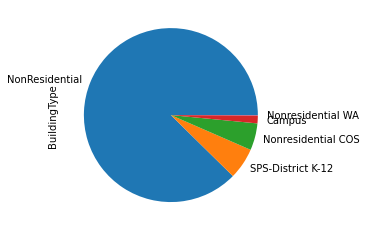

In [67]:
cat_data['BuildingType'].value_counts().plot.pie()

In [68]:
cat_data['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    299
Other                          257
Warehouse                      187
Large Office                   176
K-12 School                    141
Mixed Use Property             115
Retail Store                    94
Hotel                           76
Worship Facility                72
Distribution Center             53
Medical Office                  42
Supermarket / Grocery Store     40
Self-Storage Facility           28
University                      24
Residence Hall                  21
Senior Care Community           20
Restaurant                      12
Refrigerated Warehouse          12
Hospital                        10
Laboratory                      10
Office                           3
Low-Rise Multifamily             3
Non-Refrigerated Warehouse       2
Restaurant\n                     1
Name: PrimaryPropertyType, dtype: int64

In [69]:
cat_data.replace({'Distribution Center\n':'Distribution Center',
                  'Supermarket / Grocery Store': 'Supermarket/Grocery Store',
                  'Self-Storage Facility\n':'Self-Storage Facility',
                  'Restaurant\n': 'Restaurant',
                  'University':'College/University',
                   'Office':'Small- and Mid-Sized Office'}, inplace=True)

In [70]:
cat_data['PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    302
Other                          257
Warehouse                      187
Large Office                   176
K-12 School                    141
Mixed Use Property             115
Retail Store                    94
Hotel                           76
Worship Facility                72
Distribution Center             53
Medical Office                  42
Supermarket/Grocery Store       40
Self-Storage Facility           28
College/University              24
Residence Hall                  21
Senior Care Community           20
Restaurant                      13
Refrigerated Warehouse          12
Hospital                        10
Laboratory                      10
Low-Rise Multifamily             3
Non-Refrigerated Warehouse       2
Name: PrimaryPropertyType, dtype: int64

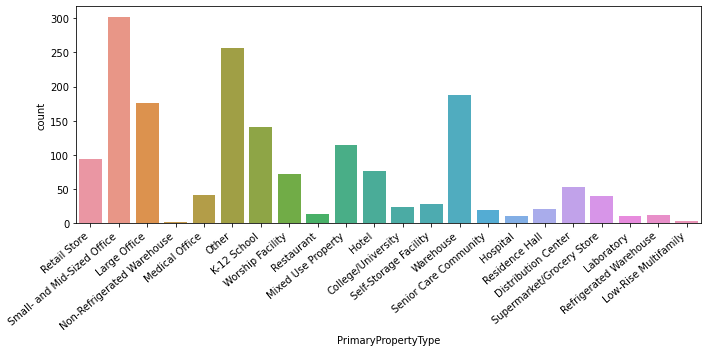

In [71]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=cat_data, x='PrimaryPropertyType')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.show()

In [72]:
#supprimer des colonnes inutiles
cat_data.drop(['PropertyName','TaxParcelIdentificationNumber'], axis=1, inplace=True)

In [73]:
cat_data['Neighborhood'].unique()

array(['DOWNTOWN', 'LAKE UNION', 'GREATER DUWAMISH', 'EAST', 'NORTHWEST',
       'SOUTHEAST', 'BALLARD', 'MAGNOLIA / QUEEN ANNE', 'NORTHEAST',
       'Central', 'NORTH', 'CENTRAL', 'SOUTHWEST', 'DELRIDGE', 'Ballard',
       'North', 'Delridge', 'Northwest', 'DELRIDGE NEIGHBORHOODS'],
      dtype=object)

In [74]:
cat_data['Neighborhood'].value_counts()

DOWNTOWN                  370
GREATER DUWAMISH          349
MAGNOLIA / QUEEN ANNE     155
LAKE UNION                151
NORTHEAST                 128
EAST                      125
NORTHWEST                  84
BALLARD                    66
NORTH                      58
CENTRAL                    51
SOUTHEAST                  48
DELRIDGE                   42
SOUTHWEST                  41
North                       9
Ballard                     6
Northwest                   5
Central                     5
Delridge                    4
DELRIDGE NEIGHBORHOODS      1
Name: Neighborhood, dtype: int64

In [75]:
cat_data.replace({'Central':'CENTRAL',
                  'North': 'NORTH',
                  'Delridge':'DELRIDGE',
                  'Northwest': 'NORTHWEST',
                  'Ballard':'BALLARD'}, inplace=True)

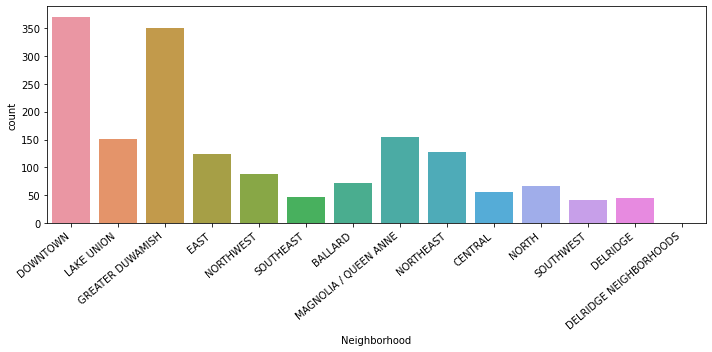

In [76]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=cat_data, x='Neighborhood')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()

plt.show()

In [77]:
cat_data.drop(['ListOfAllPropertyUseTypes','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType'], axis=1, inplace=True)

In [78]:
#Vérifions la variable ComplianceStatus qui représente la conformité des données relevées :
print("Nombre de ligne identifiées comme non conforme : {}.".format(cat_data[cat_data['ComplianceStatus'] != "Compliant"].shape[0]))

Nombre de ligne identifiées comme non conforme : 120.


In [79]:
cat_data = cat_data[cat_data['ComplianceStatus'] == "Compliant"]

In [80]:
## colones inutiles
cat_data.drop(['DefaultData','ComplianceStatus'], axis=1, inplace=True)


C:\Users\Admin\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


<AxesSubplot:>

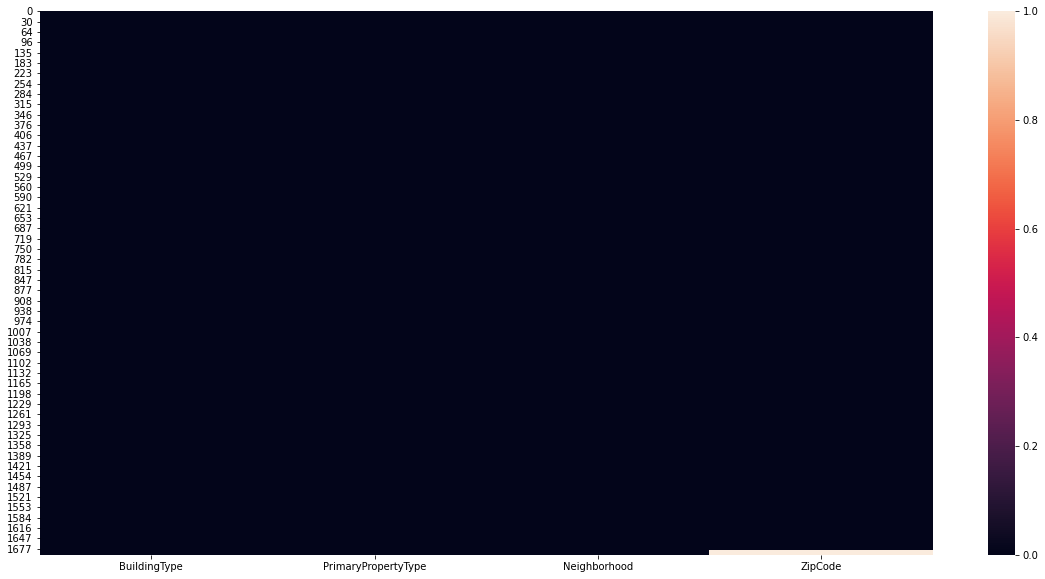

In [81]:
# valeurs manquantes(cat_dat)
plt.figure(figsize=(20,10))
sns.heatmap(cat_data.isna())

In [82]:
#nombre de valeurs nan dans chaque colonne: variables categoriques.
cat_data.isna().sum()

BuildingType            0
PrimaryPropertyType     0
Neighborhood            0
ZipCode                13
dtype: int64

In [83]:
#concaténer num-data et cat_data 
data=pd.concat([num_data,cat_data],axis=1)
data

,DataYear,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUIWN(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions,GHGEmissionsIntensity,BuildingType,PrimaryPropertyType,Neighborhood,ZipCode
0,2015.0,1989.0,1.0,4.0,111077.0,0.0,111077.0,NaN,91.0,62.100000,195.100000,1.015579e+07,0.0,9.899135e+06,0.000000e+00,69.01,0.24,NonResidential,Retail Store,DOWNTOWN,18081.0
1,2015.0,1906.0,1.0,6.0,98370.0,25920.0,72450.0,98370.0,45.0,66.500000,207.700000,6.541579e+06,0.0,6.488262e+06,3.789300e+04,47.24,0.20,NonResidential,Small- and Mid-Sized Office,DOWNTOWN,18081.0
2,2015.0,1947.0,1.0,4.0,193788.0,37854.0,155934.0,138672.0,59.0,104.000000,326.400000,1.646398e+07,0.0,1.676091e+07,0.000000e+00,116.84,0.23,NonResidential,Large Office,LAKE UNION,18390.0
3,2015.0,2008.0,1.0,3.0,76598.0,21410.0,55188.0,55188.0,76.0,83.700000,166.900000,4.617864e+06,0.0,2.234200e+06,2.242889e+06,134.69,1.63,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,18388.0
4,2015.0,1981.0,1.0,4.0,186971.0,0.0,186971.0,186977.0,86.0,72.600000,184.200000,1.357538e+07,0.0,9.657951e+06,3.004906e+06,226.92,0.99,NonResidential,Large Office,LAKE UNION,18390.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1693,2016.0,1990.0,1.0,1.0,12294.0,0.0,12294.0,12294.0,46.0,76.699997,176.100006,9.430032e+05,0.0,5.242709e+05,3.254750e+05,20.94,1.70,NaN,NaN,NaN,NaN
1694,2016.0,2004.0,1.0,1.0,16000.0,0.0,16000.0,16000.0,NaN,65.900002,118.900001,1.053706e+06,0.0,3.965461e+05,5.537300e+05,32.17,2.01,Nonresidential COS,Other,DOWNTOWN,NaN
1695,2016.0,1974.0,1.0,1.0,13157.0,0.0,13157.0,7583.0,NaN,460.100006,767.799988,6.053764e+06,0.0,1.792159e+06,3.973739e+06,223.54,16.99,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,NaN
1696,2016.0,1989.0,1.0,1.0,14101.0,0.0,14101.0,6601.0,NaN,55.500000,110.800003,7.828413e+05,0.0,3.488702e+05,3.706010e+05,22.11,1.57,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,NaN


In [84]:
#les variables à prédire:  (SiteEnergyUse(kBtu)) et  (TotalGHGEmissions). 
#supprimer les valeurs manquantes sur ces variables:
data.drop(data.loc[data['SiteEnergyUseWN(kBtu)'].isnull()].index,inplace=True)
data.drop(data.loc[data['TotalGHGEmissions'].isnull()].index, inplace=True)

In [85]:
#enregistrement du fichier
data.to_csv("build_data_to_model1.csv", header=True, index=False) 

## Analyse bivariée

## les variables à prédire

## la variable SiteEnergyUseWN(kBtu)

<AxesSubplot:xlabel='BuildingType', ylabel='SiteEnergyUseWN(kBtu)'>

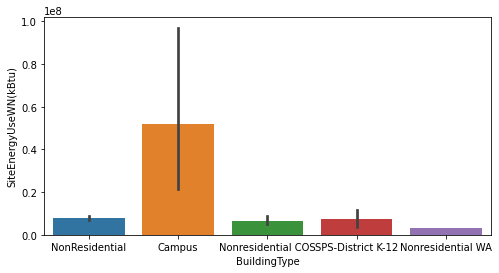

In [86]:
fig = plt.figure(figsize=(8, 4))
sns.barplot(x='BuildingType',y='SiteEnergyUseWN(kBtu)',data=data)

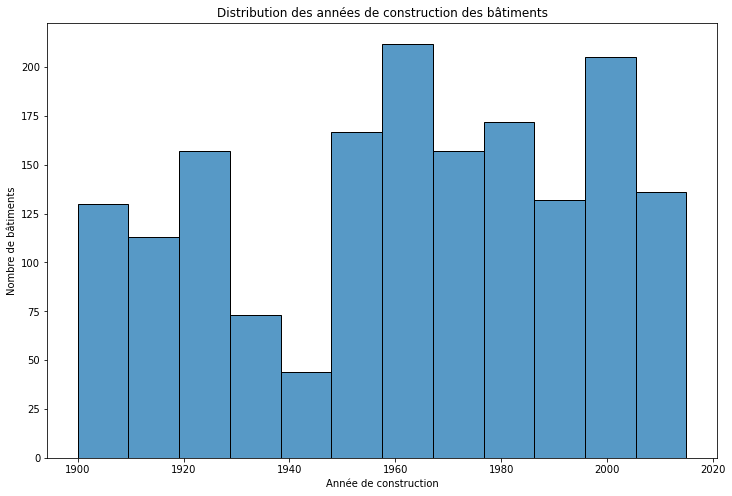

In [87]:
fig = plt.figure(figsize=(12,8))
ax = sns.histplot(data=num_data, x='YearBuilt')
ax.set_xlabel("Année de construction")
ax.set_ylabel("Nombre de bâtiments")
plt.title("Distribution des années de construction des bâtiments")
plt.show()

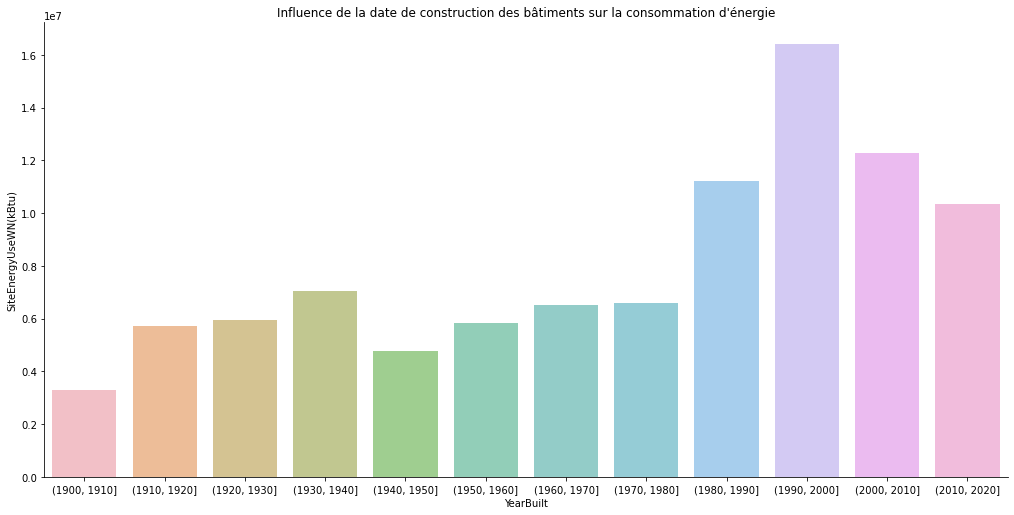

In [88]:
bins = pd.IntervalIndex.from_tuples([(1900, 1910), (1910, 1920), (1920, 1930), (1930, 1940), (1940, 1950), 
                                     (1950, 1960), (1960, 1970), (1970,1980), (1980,1990), (1990,2000), 
                                     (2000,2010), (2010,2020)])

sns.catplot(
    data=data, kind="bar",
    x=pd.cut(data['YearBuilt'], bins=bins), y="SiteEnergyUseWN(kBtu)",
    ci=None,  alpha=.6,
    height=7, aspect=2
)
plt.title("Influence de la date de construction des bâtiments sur la consommation d'énergie")
plt.show()#les émissions de CO2

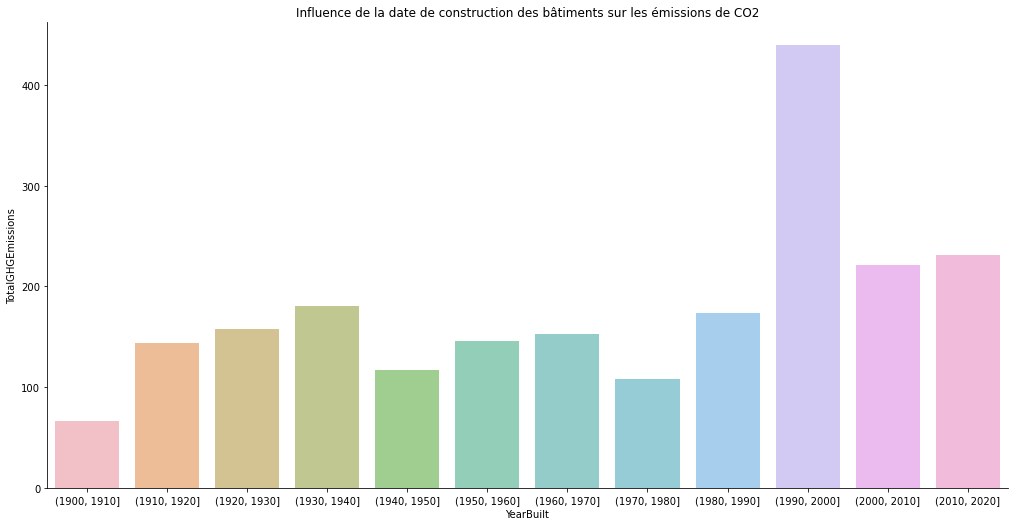

In [89]:
bins = pd.IntervalIndex.from_tuples([(1900, 1910), (1910, 1920), (1920, 1930), (1930, 1940), (1940, 1950), 
                                     (1950, 1960), (1960, 1970), (1970,1980), (1980,1990), (1990,2000), 
                                     (2000,2010), (2010,2020)])

sns.catplot(
    data=data, kind="bar",
    x=pd.cut(data['YearBuilt'], bins=bins), y="TotalGHGEmissions",
    ci=None, alpha=.6,
    height=7, aspect=2
)
plt.title("Influence de la date de construction des bâtiments sur les émissions de CO2")
plt.show()

Text(0.5, 1.0, "Distribution de la consommation d'enérgie")

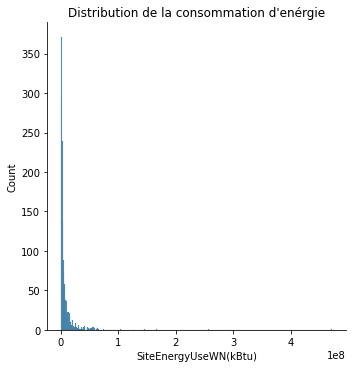

In [90]:
sns.displot(data, x='SiteEnergyUseWN(kBtu)')
plt.title("Distribution de la consommation d'enérgie")

Text(0.5, 1.0, "Distribution de la consommation d'enérgie zoomées")

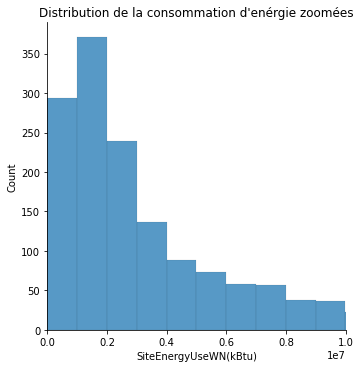

In [91]:
sns.displot(data, x='SiteEnergyUseWN(kBtu)')
plt.xlim(0,10000000)
plt.title("Distribution de la consommation d'enérgie zoomées")

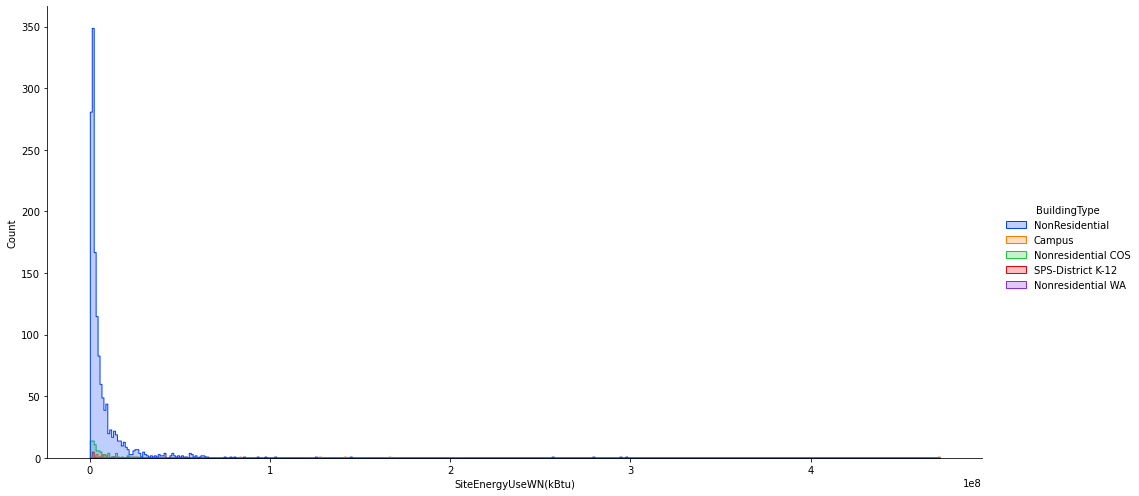

In [92]:
sns.displot(data, x='SiteEnergyUseWN(kBtu)', hue='BuildingType', element="step", palette='bright', height=7, aspect=2)

(0.0, 10000000.0)

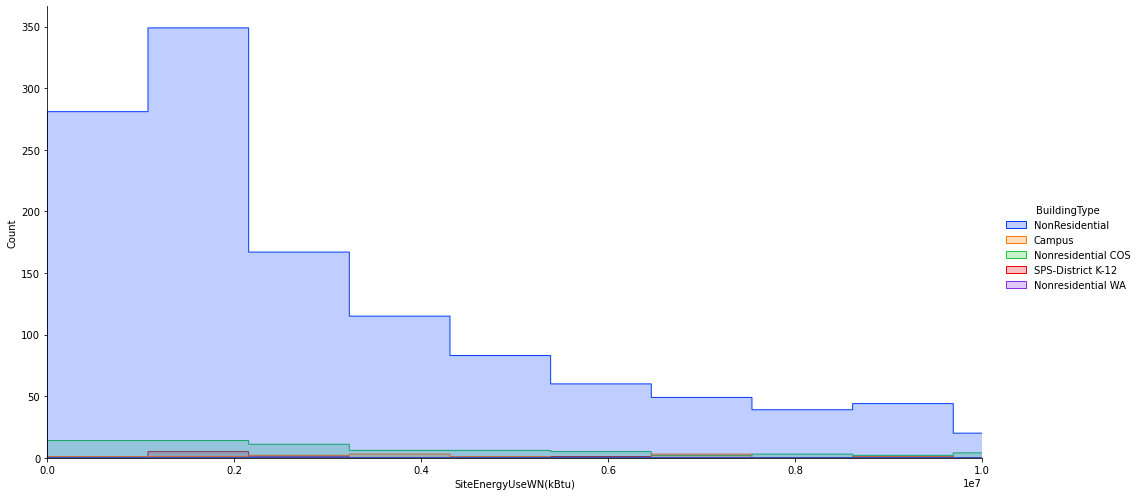

In [93]:
sns.displot(data, x='SiteEnergyUseWN(kBtu)', hue='BuildingType', element="step", palette='bright', height=7, aspect=2)
plt.xlim(0,10000000)

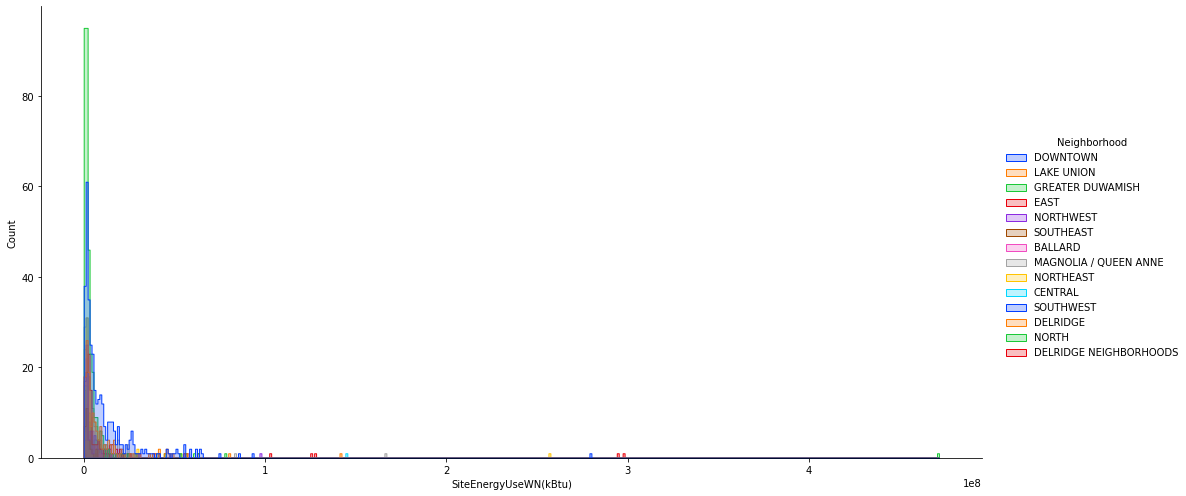

In [94]:
sns.displot(data, x='SiteEnergyUseWN(kBtu)', hue='Neighborhood', element="step", palette='bright', height=7, aspect=2)

(0.0, 10000000.0)

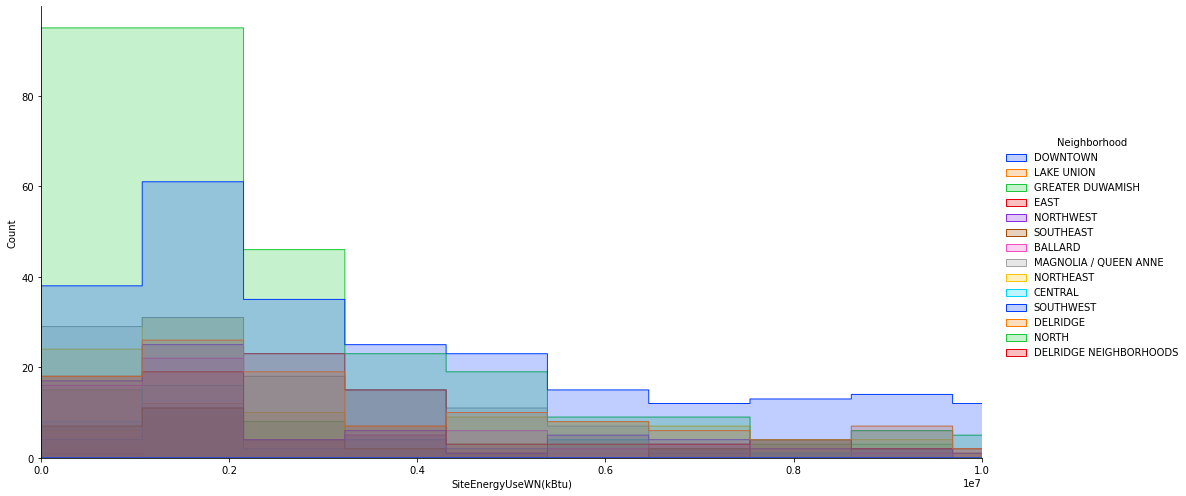

In [95]:
sns.displot(data, x='SiteEnergyUseWN(kBtu)', hue='Neighborhood', element="step", palette='bright', height=7, aspect=2)
plt.xlim(0,10000000)

<AxesSubplot:xlabel='BuildingType'>

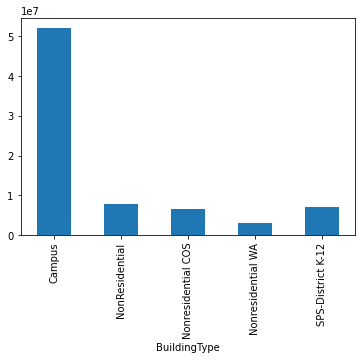

In [96]:
data.groupby('BuildingType')['SiteEnergyUseWN(kBtu)'].mean().plot(kind='bar')

<AxesSubplot:xlabel='ENERGYSTARScore', ylabel='SiteEnergyUseWN(kBtu)'>

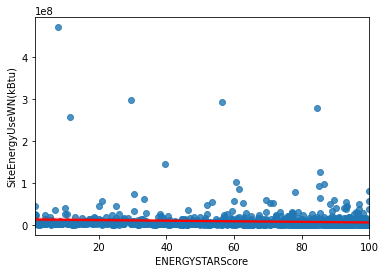

In [97]:
sns.regplot(y='SiteEnergyUseWN(kBtu)' ,x='ENERGYSTARScore',  data=data, line_kws={'color':'red'})

Text(0.5, 1.0, "Nbre d'étages vs Consommation d'électricité")

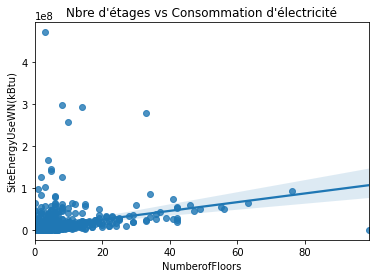

In [98]:
sns.regplot(x='NumberofFloors', y='SiteEnergyUseWN(kBtu)', data=data)
plt.title("Nbre d'étages vs Consommation d'électricité")

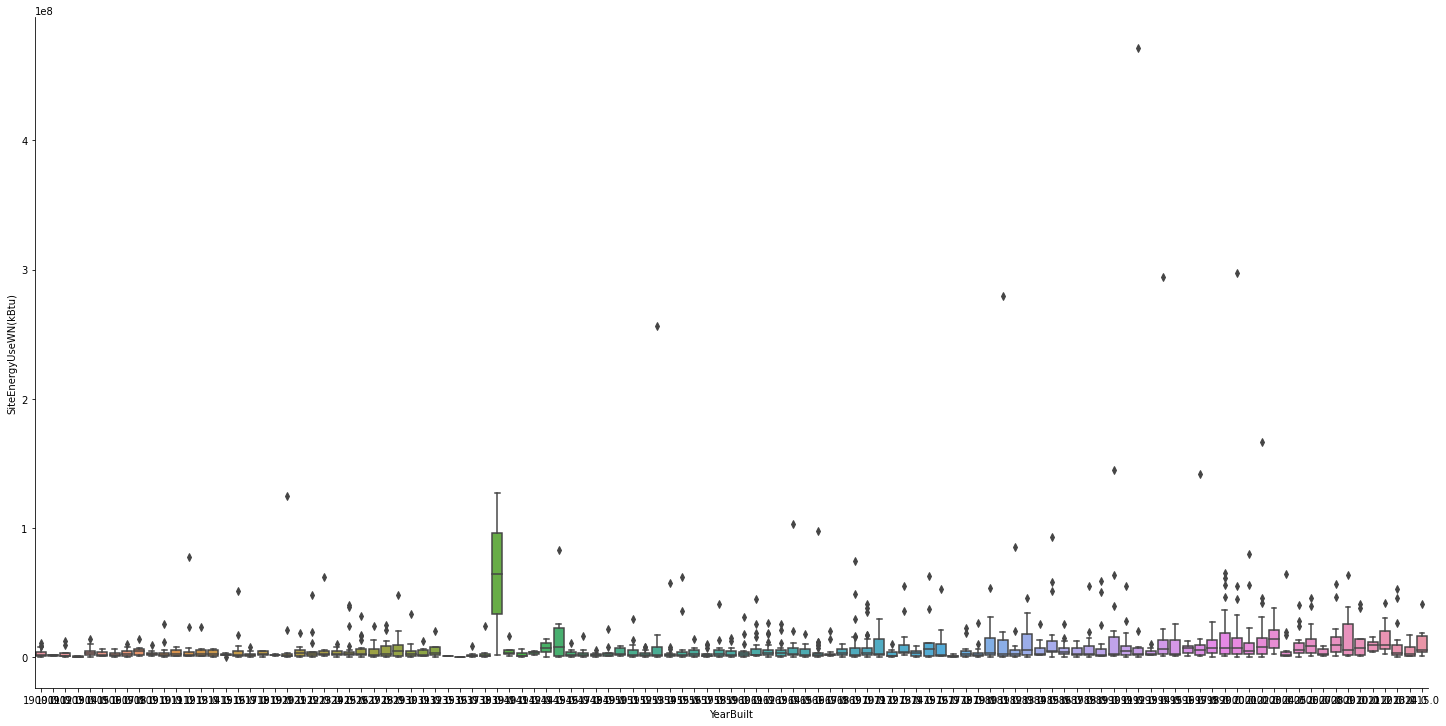

In [99]:
sns.catplot(x='YearBuilt', y='SiteEnergyUseWN(kBtu)', data=data, height=10, aspect=2, kind='box')

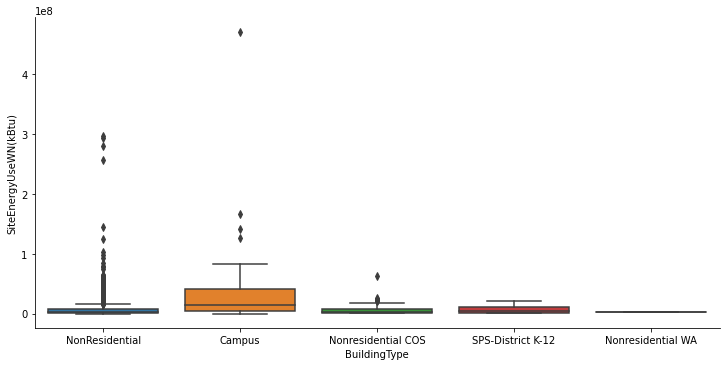

In [100]:
sns.catplot(x='BuildingType', y='SiteEnergyUseWN(kBtu)', data=data, height=5, aspect=2, kind='box')

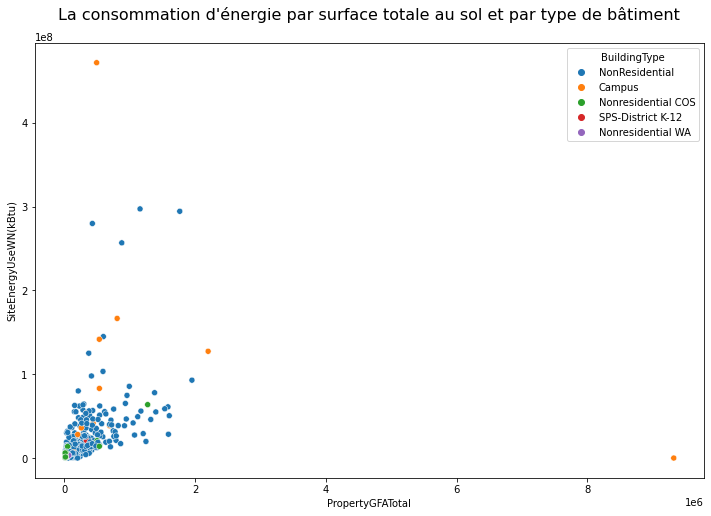

In [101]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFATotal', y='SiteEnergyUseWN(kBtu)', hue='BuildingType')
plt.title(f"La consommation d'énergie par surface totale au sol et par type de bâtiment\n", 
           fontsize=16)
plt.show()

## la variable TotalGHGEmissions

<AxesSubplot:xlabel='BuildingType', ylabel='TotalGHGEmissions'>

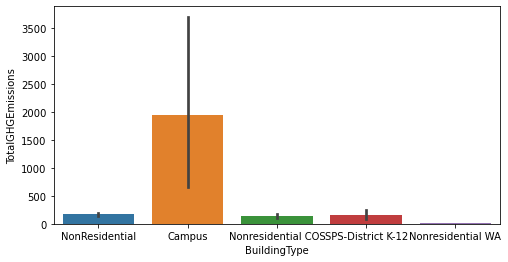

In [102]:
fig = plt.figure(figsize=(8, 4))
sns.barplot(x='BuildingType',y='TotalGHGEmissions',data=data)

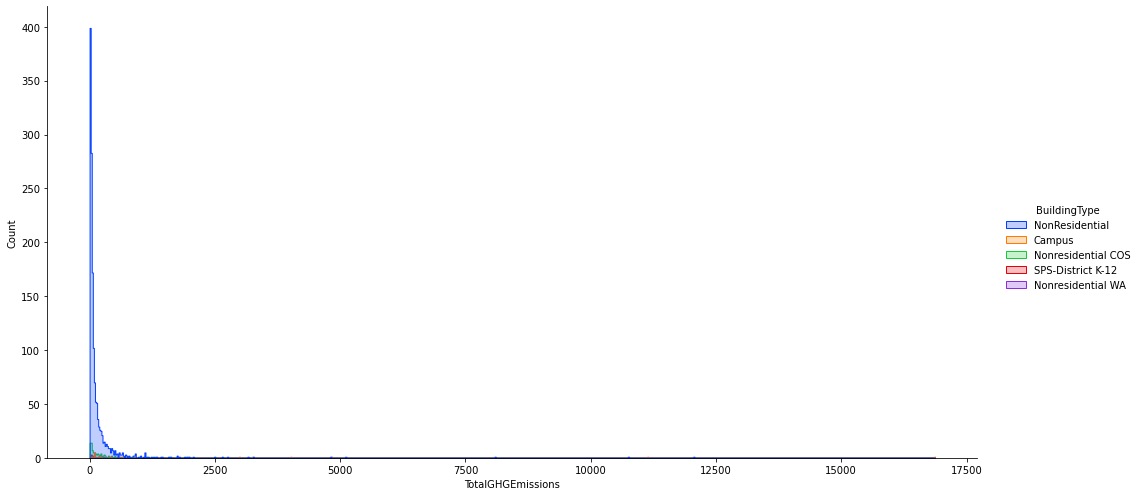

In [103]:
sns.displot(data, x='TotalGHGEmissions', hue='BuildingType', element="step", palette='bright', height=7, aspect=2)

Text(0.5, 1.0, 'Distribution des émissions de co2')

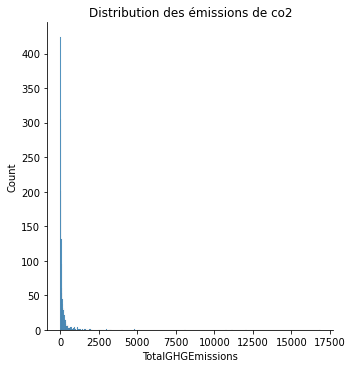

In [104]:
sns.displot(data, x='TotalGHGEmissions')
plt.title("Distribution des émissions de co2")

Text(0.5, 1.0, 'Distribution des émissions de co2 zoomées')

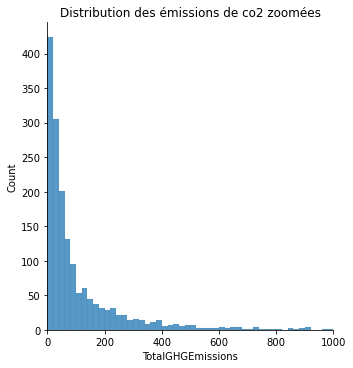

In [105]:
sns.displot(data, x='TotalGHGEmissions')
plt.xlim(0,1000)
plt.title("Distribution des émissions de co2 zoomées")

(0.0, 1000.0)

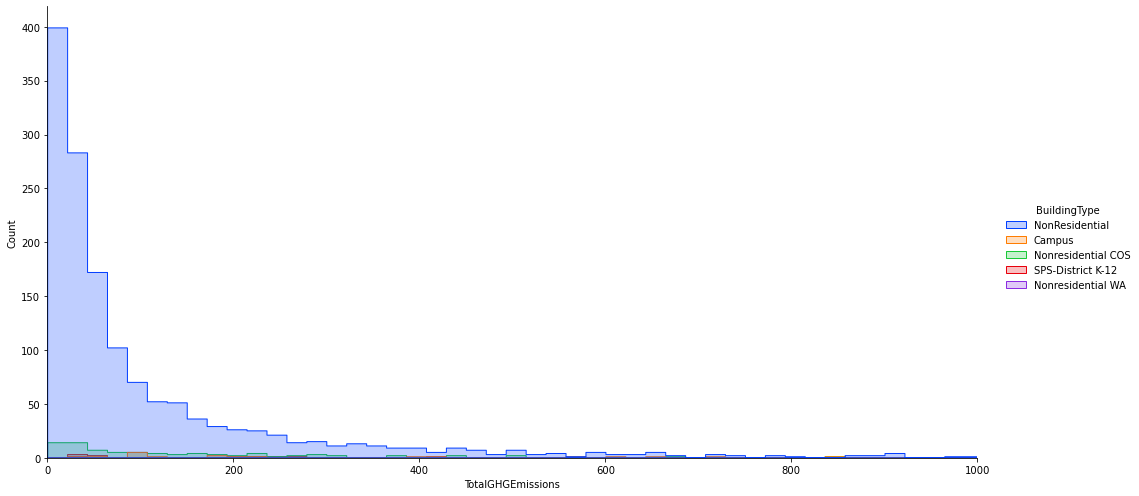

In [106]:
sns.displot(data, x='TotalGHGEmissions', hue='BuildingType', element="step", palette='bright', height=7, aspect=2)
plt.xlim(0,1000)

<AxesSubplot:xlabel='BuildingType'>

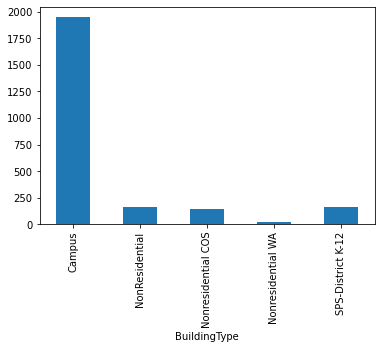

In [107]:
data.groupby('BuildingType')['TotalGHGEmissions'].mean().plot(kind='bar')

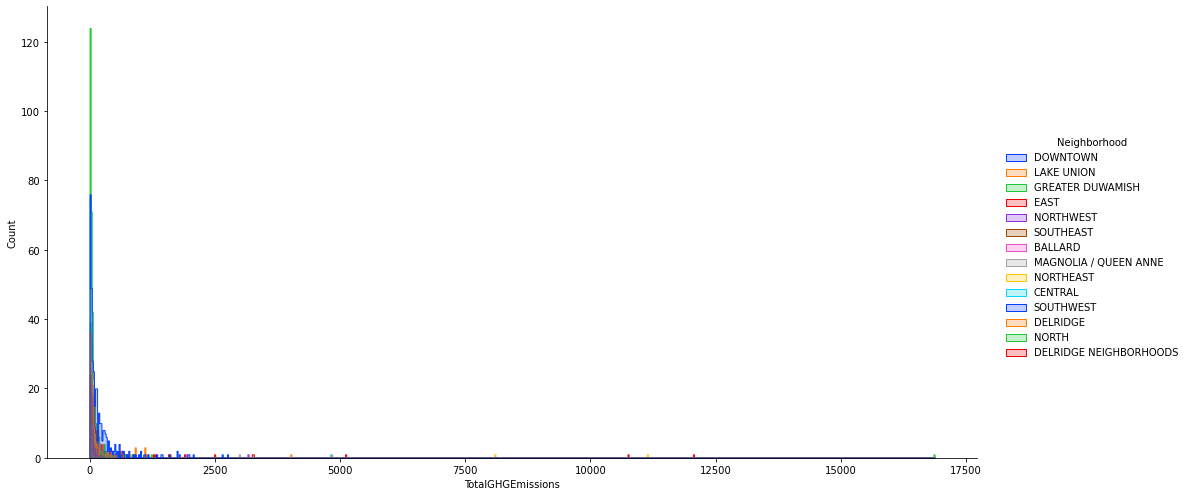

In [108]:
sns.displot(data, x='TotalGHGEmissions', hue='Neighborhood', element="step", palette='bright', height=7, aspect=2)

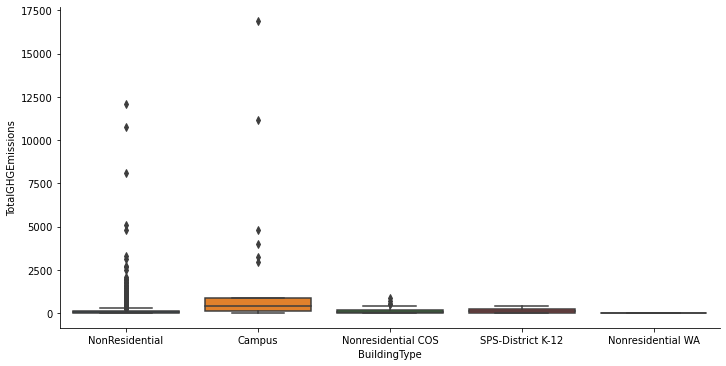

In [109]:
sns.catplot(x='BuildingType', y='TotalGHGEmissions', data=data, height=5, aspect=2, kind='box')

(0.0, 1000.0)

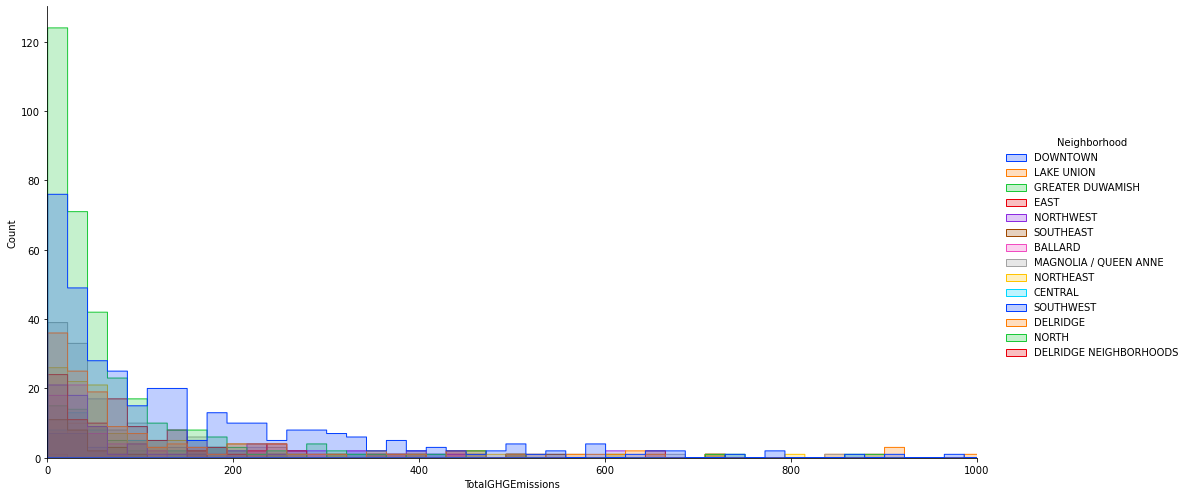

In [110]:
sns.displot(data, x='TotalGHGEmissions', hue='Neighborhood', element="step", palette='bright', height=7, aspect=2)
plt.xlim(0,1000)

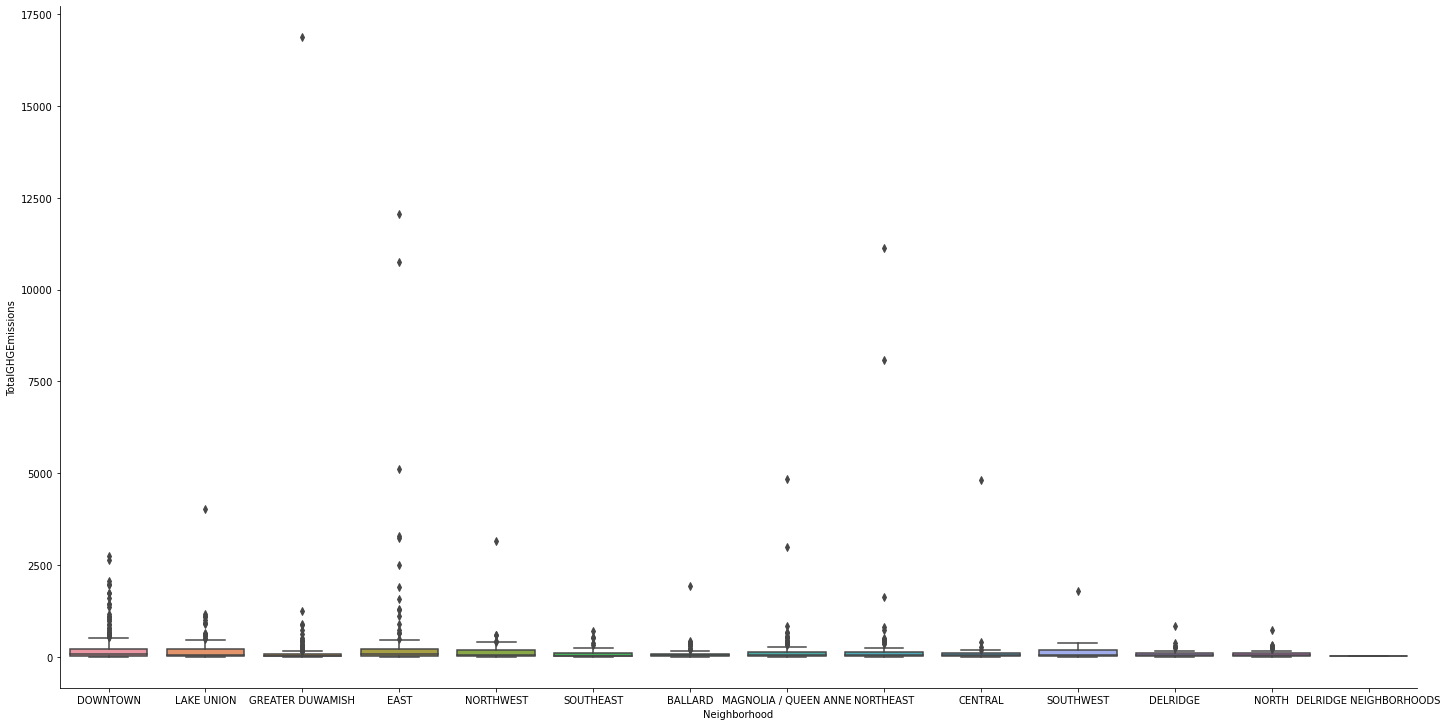

In [111]:
sns.catplot(x='Neighborhood', y='TotalGHGEmissions', data=data, height=10, aspect=2, kind='box')

Text(0.5, 1.0, "Nombre d'étages par rapport aux émissions de co2")

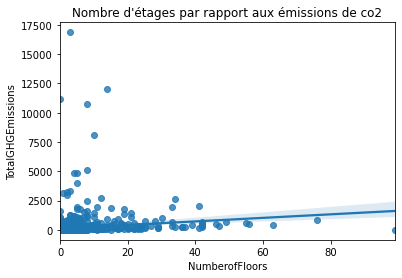

In [112]:
sns.regplot(x='NumberofFloors', y='TotalGHGEmissions', data=data)
plt.title("Nombre d'étages par rapport aux émissions de co2")

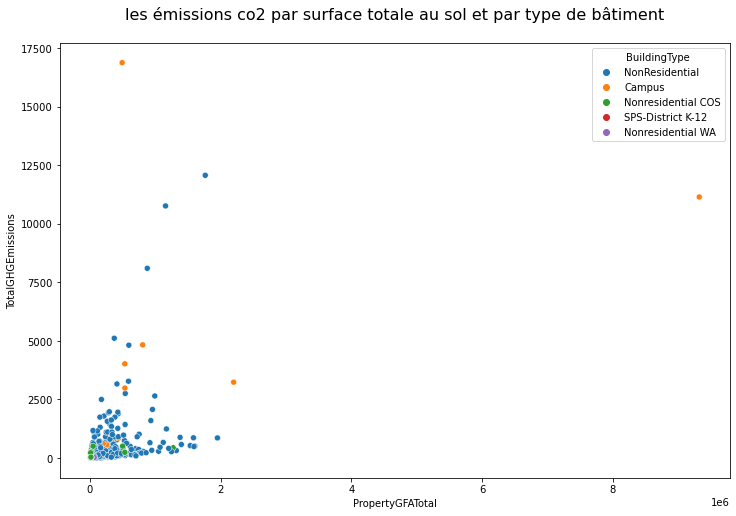

In [113]:
fig = plt.figure(figsize=(12,8))
sns.scatterplot(data = data, x='PropertyGFATotal', y='TotalGHGEmissions', hue='BuildingType')
plt.title(f"les émissions co2 par surface totale au sol et par type de bâtiment\n", 
           fontsize=16)
plt.show()

In [114]:
## les emission de co2 en fonction de la consommation totale d'énergie

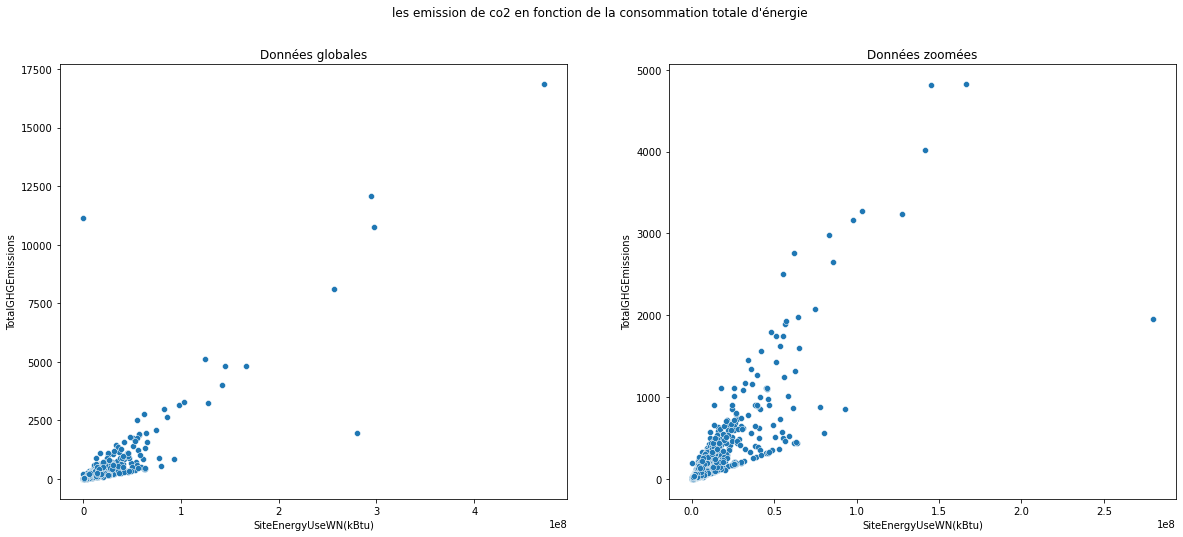

In [115]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.scatterplot(data=data, x="SiteEnergyUseWN(kBtu)", y="TotalGHGEmissions", ax=axes[0])
axes[0].set_title("Données globales")
sns.scatterplot(data=data[(data['TotalGHGEmissions'] < 5000)], x="SiteEnergyUseWN(kBtu)", y="TotalGHGEmissions", ax=axes[1])
axes[1].set_title("Données zoomées")
plt.suptitle("les emission de co2 en fonction de la consommation totale d'énergie")
plt.show()

<AxesSubplot:xlabel='SiteEnergyUseWN(kBtu)', ylabel='TotalGHGEmissions'>

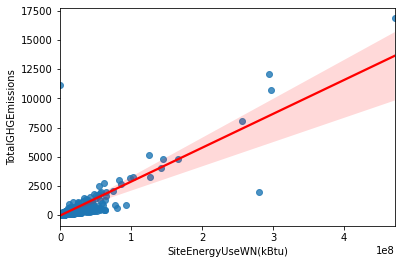

In [116]:
sns.regplot(y='TotalGHGEmissions', x='SiteEnergyUseWN(kBtu)' , data=data, line_kws={'color':'red'})

## la variable ENERGYSTARScore

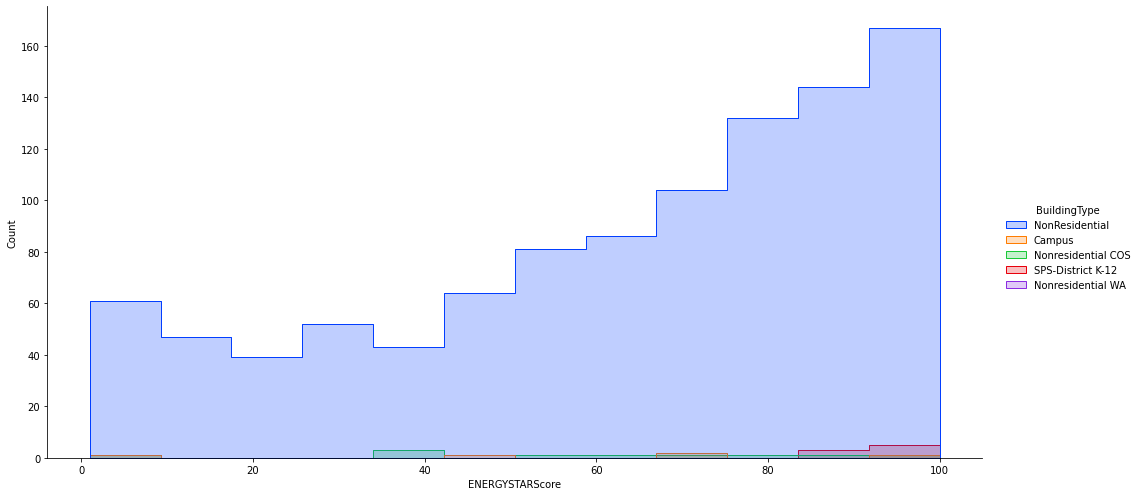

In [117]:
sns.displot(data, x='ENERGYSTARScore', hue='BuildingType', element="step", palette='bright', height=7, aspect=2)

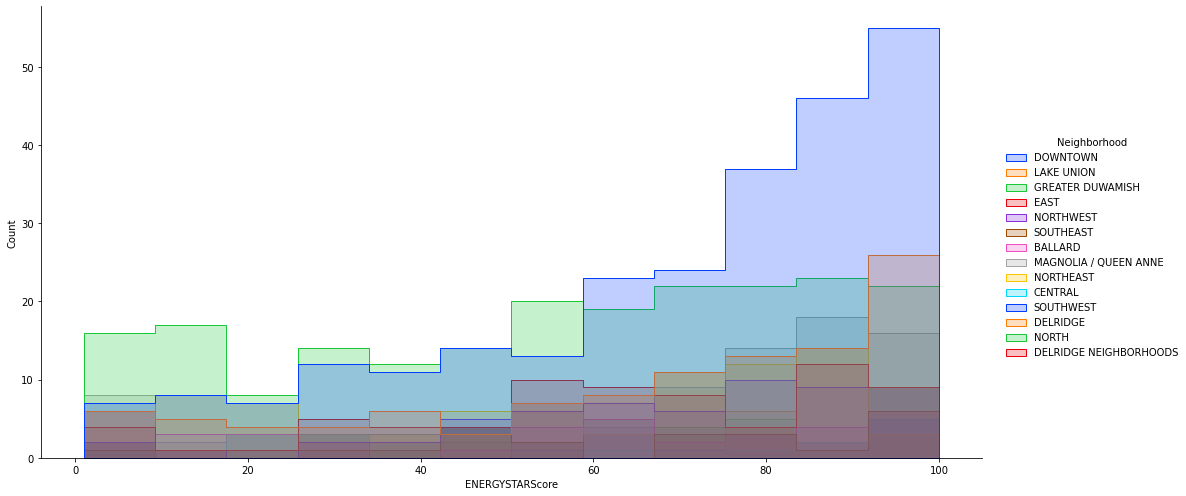

In [118]:
sns.displot(data, x='ENERGYSTARScore', hue='Neighborhood', element="step", palette='bright', height=7, aspect=2)

<AxesSubplot:xlabel='ENERGYSTARScore', ylabel='TotalGHGEmissions'>

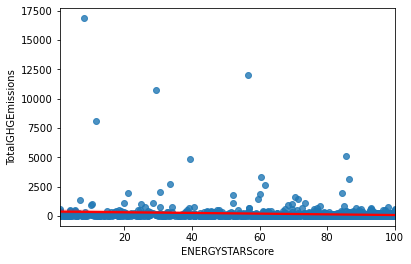

In [119]:
sns.regplot(x='ENERGYSTARScore' ,y='TotalGHGEmissions',  data=data, line_kws={'color':'red'})